# Exploratory data analysis of admissions data from the Saint Petersburg State University of Architecture and Civil Engineering for 2022

-----
### Goal: to correctly build a strategy for working with applicants and become a real pole of talent attraction.
### Task: to analyze the available data only for applicants who applied for full-time study.
### Source data: admissions campaign data for 2022.
*****

### Task execution plan:
1. Importing required libraries
2. Loading data, studying general information about the data, combining information about the necessary preliminary processing of features into a single table
3. Preparing data for analysis
4. Report (part 1: General information about the admissions campaign)  

    4.1 Start and end date for accepting documents  
    4.2 Number of applications, including by faculties and fields of study  
    4.3 Number of unique applicants  
    4.4 Number of applications per applicant, average, median  
    4.5 Distribution by methods of submitting documents  
    4.6 Distribution by reasons for admission, levels of education, types of education  
    4.7 Distribution by region, citizenship  
    4.8 Number of consents in fields of study before the publication of competition lists
    
    
5. Intermediate conclusion
6. Report (part 2: Portrait of an applicant)  

    6.1 Portrait of an applicant: gender, age, where he studied, where he lives (St. Petersburg or the regions, maybe some region is more active on average), what fields of study he chose (i.e. the most popular fields of study), how many applications he submitted, which way, what are his entrance test scores. What else important can be said about him?  
    
    6.2 Select 2 categories from the proposed ones and compare their portraits:  
    
     •	Applicant enrolled on a budgetary basis  
     •	Applicant enrolled on a target basis  
     •	Non-enrolled applicant (please note that only those who were not enrolled in any field of study should be retained)  
    
    
7. General conclusion

## <span style="color:green"> $\checkmark$ </span> 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots
from plotly.subplots import make_subplots
from collections import Counter
import requests
from io import StringIO

## <span style="color:green"> $\checkmark$ </span> 2. Research general information from the file

### Reading data from the file

In [2]:
response = requests.get('https://raw.githubusercontent.com/khaybullina/Internship_SPbGASU/main/admissions_data.csv')
csv_content = response.text
csv_file = StringIO(csv_content)
df1 = pd.read_csv(csv_file, index_col=0)

In [3]:
df1.head()

Unique code Date of application  Sum of points  \
0  154-702-875          30.07.2022            323   
1  154-702-875          30.07.2022            323   
2  154-702-875          30.07.2022            323   
3  154-702-875          30.07.2022            323   
4  165-530-013          04.07.2022            301   

   Sum of points for individual achievements (competitive)  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

  Consent to enrollment     Sex Date of Birth Citizenship  \
0                    No  Female    14.08.2004      RUSSIA   
1                    No  Female    14.08.2004      RUSSIA   
2                   Yes  Female    14.08.2004      RUSSIA   
3                    No  Female    14.08.2004      RUSSIA   
4                    No  Female    22.10.2004      RUSSIA   

  Reason for admission      Admission category Form of education  \
0      budgetary basis  Having a special right         full-time   
1      budgetary basis  Having a special right         full-time   
2      budgetary basis  Having a special right         full-time   
3      budgetary basis  Having a special right         full-time   
4      budgetary basis  Having a special right         full-time   

  The level of education                           Field of study/Specialty  \
0               Bachelor                            07.03.04 Urban planning   
1               Bachelor       07.03.03 Design of architectural environment   
2               Bachelor                              07.03.01 Architecture   
3               Bachelor  07.03.02 Reconstruction and restoration of arc...   
4               Bachelor       07.03.03 Design of architectural environment   

                   Faculty Region by registration  Type of education  \
0  Faculty of Architecture          Tatarstan Rep  Secondary general   
1  Faculty of Architecture          Tatarstan Rep  Secondary general   
2  Faculty of Architecture          Tatarstan Rep  Secondary general   
3  Faculty of Architecture          Tatarstan Rep  Secondary general   
4  Faculty of Architecture  Saint Petersburg city  Secondary general   

   Year of completion     Status  \
0                2022  Submitted   
1                2022  Submitted   
2                2022   Enrolled   
3                2022  Submitted   
4                2022  Submitted   

                           Delivery of documents  \
0  Superservice "Admission to university online"   
1  Superservice "Admission to university online"   
2  Superservice "Admission to university online"   
3  Superservice "Admission to university online"   
4                                     Personally   

  Date of consent for enrollment  
0                            NaN  
1                            NaN  
2            30.07.2022 11:41:43  
3                            NaN  
4                            NaN

In [4]:
df1.tail()

Unique code Date of application  Sum of points  \
29465  170-149-613          22.07.2022              0   
29466  170-149-613          22.07.2022              0   
29467  170-149-613          22.07.2022              0   
29468  170-149-613          22.07.2022              0   
29469  170-149-613          22.07.2022              0   

       Sum of points for individual achievements (competitive)  \
29465                                                  0         
29466                                                  0         
29467                                                  0         
29468                                                  0         
29469                                                  0         

      Consent to enrollment   Sex Date of Birth Citizenship  \
29465                    No  Male    25.07.2000      RUSSIA   
29466                    No  Male    25.07.2000      RUSSIA   
29467                    No  Male    25.07.2000      RUSSIA   
29468                    No  Male    25.07.2000      RUSSIA   
29469                    No  Male    25.07.2000      RUSSIA   

      Reason for admission  Admission category Form of education  \
29465      budgetary basis  On a general basis         full-time   
29466      budgetary basis  On a general basis         full-time   
29467      budgetary basis  On a general basis         full-time   
29468      budgetary basis  On a general basis         full-time   
29469      budgetary basis  On a general basis         full-time   

      The level of education  \
29465               Bachelor   
29466               Bachelor   
29467               Bachelor   
29468               Bachelor   
29469               Bachelor   

                                Field of study/Specialty  \
29465                              08.03.01 Construction   
29466                         15.03.03 Applied mechanics   
29467  01.03.02 Applied mathematics and computer science   
29468         23.03.01 Technology of transport processes   
29469  13.03.01 Thermal power engineering and heating...   

                                                 Faculty  \
29465                       Faculty of Civil Engineering   
29466            Faculty of Automobile and Road Building   
29467                       Faculty of Civil Engineering   
29468            Faculty of Automobile and Road Building   
29469  Faculty of Environmental Engineering and Munic...   

      Region by registration  Type of education  Year of completion  \
29465  Saint Petersburg city  Secondary general                2018   
29466  Saint Petersburg city  Secondary general                2018   
29467  Saint Petersburg city  Secondary general                2018   
29468  Saint Petersburg city  Secondary general                2018   
29469  Saint Petersburg city  Secondary general                2018   

          Status Delivery of documents Date of consent for enrollment  
29465  Submitted                   Web                            NaN  
29466  Submitted                   Web                            NaN  
29467  Submitted                   Web                            NaN  
29468  Submitted                   Web                            NaN  
29469  Submitted                   Web                            NaN

In [5]:
df1.shape

(29247, 20)

#### for further work, we will leave the data with full-time education (according to the assignment):

In [6]:
df1['Form of education'].unique()

array(['full-time', 'part-time', 'extramural studies'], dtype=object)

In [7]:
df = df1[df1['Form of education'] == 'full-time']

In [8]:
df.shape

(27797, 20)

### Feature information: data types, missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27797 entries, 0 to 29469
Data columns (total 20 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   Unique code                                              27797 non-null  object
 1   Date of application                                      27797 non-null  object
 2   Sum of points                                            27797 non-null  int64 
 3   Sum of points for individual achievements (competitive)  27797 non-null  int64 
 4   Consent to enrollment                                    27797 non-null  object
 5   Sex                                                      27797 non-null  object
 6   Date of Birth                                            27797 non-null  object
 7   Citizenship                                              27780 non-null  object
 8   Reason for admission                

### Let's look at the unique values

In [10]:
print('\033[1m'+ 'Unique values'+'\033[0m'+'\n')
for i in df.columns.to_list():
    print('\033[91m'+ 'The {} feature has {} the following unique values:'.format(i, len(df[i].unique()))+'\033[0m')
    print(df[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Unique values

The Unique code feature has 5295 the following unique values:
['154-702-875' '165-530-013' '200-853-207' ... '000102250' '192-932-664'
 '170-149-613']
---------------------------------------------------------------------------------
The Date of application feature has 63 the following unique values:
['30.07.2022' '04.07.2022' '22.06.2022' '20.07.2022' '24.06.2022'
 '22.07.2022' '05.07.2022' '25.07.2022' '08.07.2022' '01.07.2022'
 '30.06.2022' '14.07.2022' '07.07.2022' '29.06.2022' '11.07.2022'
 '09.07.2022' '23.06.2022' '15.07.2022' '28.06.2022' '19.07.2022'
 '26.07.2022' '21.07.2022' '28.07.2022' '13.07.2022' '06.07.2022'
 '12.07.2022' '27.07.2022' '31.07.2022' '18.07.2022' '27.06.2022'
 '21.06.2022' '20.06.2022' '29.07.2022' '02.08.2022' '01.08.2022'
 '08.08.2022' '04.08.2022' '23.07.2022' '12.08.2022' '02.07.2022'
 '09.08.2022' '03.08.2022' '10.07.2022' '24.07.2022' '16.07.2022'
 '17.07.2022' '31.08.2022' '26.08.2022' '18.08.2022' '15.08.2022'
 '05.08.2022' '24.08.202

The Date of consent for enrollment feature has 2062 the following unique values:
[nan '30.07.2022 11:41:43' '25.07.2022 12:28:56' ... '01.08.2022 14:55:04'
 '25.07.2022 16:32:52' '01.08.2022 14:00:41']
---------------------------------------------------------------------------------


## Aggregated information by features

**Let's summarize the information obtained in the following table** 
<a class="anchor" id="agg_table"></a>

|Field name|Visible problems|Intended processing actions| 
|-------------:|:------|:------------|
|**Unique code** |The feature has different recording forms|During the project|
|**Date of application** |The object type does not correspond to the meaning of the feature|Change feature type|
|**Sum of points** |There are no visible problems with the feature|One should pay attention to lines with zero points; perhaps these applicants have benefits for admission|
|**Sum of points for individual achievements (competitive)**, **Reason for admission**, **Admission category**,  |There are no visible problems with the features|During the project|
|**Form of education**, **The level of education**, **Faculty**, **Status**, **Delivery of documents**|There are no visible problems with the features|During the project|
|**Consent to enrollment**, **Sex**|There are no visible problems with the features|As the project progresses, it may be more convenient to change the data type to numeric or bool|     
|**Date of Birth**|The object type does not correspond to the meaning of the feature|Change feature type|
|**Citizenship**, **Region by registration**|There are gaps|Explore the gaps|
|**Field of study/Specialty** |There are no visible problems with the feature|As the project progresses, it may be more convenient to divide this feature into two|
|**Type of education**|There are no visible problems with the feature|During the project|
|**Year of completion**|The minimum value, 1900, is unlikely and appears to be an anomaly|Process anomalous values|
|**Date of consent for enrollment**|The object type does not correspond to the meaning of the feature. There are a large number of gaps.|Change the type of feature, process gaps if this feature is needed for analysis.

## Comment

1. In general, we have data suitable for further analysis.
2. Certain features require preprocessing, in particular:
 - data type changes;
 - recovery of gaps;
 - anomaly processing.

## <span style="color:green"> $\checkmark$ </span> 3. Data preparation

### For ease of use, let's rename the columns

In [11]:
df.rename(columns = {'Unique code':'id', 'Date of application':'date_app', 'Sum of points':'sum_points', \
                     'Sum of points for individual achievements (competitive)':'sum_points_ind', \
                     'Consent to enrollment':'consent', 'Sex':'gender', 'Date of Birth':'date_birth', \
                     'Citizenship':'nationality', 'Reason for admission':'cost', 'Admission category':'privileges', \
                     'Form of education':'form', 'The level of education':'level', 'Field of study/Specialty':'profession', \
                     'Faculty':'faculty', 'Region by registration':'region', 'Type of education':'education', \
                     'Year of completion':'date_end', 'Status':'status', 'Delivery of documents':'delivery_doc', \
                     'Date of consent for enrollment':'date_consent'}, inplace = True )
df.head(1)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


id    date_app  sum_points  sum_points_ind consent  gender  \
0  154-702-875  30.07.2022         323               0      No  Female   

   date_birth nationality             cost              privileges       form  \
0  14.08.2004      RUSSIA  budgetary basis  Having a special right  full-time   

      level               profession                  faculty         region  \
0  Bachelor  07.03.04 Urban planning  Faculty of Architecture  Tatarstan Rep   

           education  date_end     status  \
0  Secondary general      2022  Submitted   

                                    delivery_doc date_consent  
0  Superservice "Admission to university online"          NaN

### Converting feature types

In [12]:
df['date_app'] = pd.to_datetime(df['date_app'], 
                              format = '%d.%m.%Y')
df['date_birth'] = pd.to_datetime(df['date_birth'], 
                              format = '%d.%m.%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27797 entries, 0 to 29469
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              27797 non-null  object        
 1   date_app        27797 non-null  datetime64[ns]
 2   sum_points      27797 non-null  int64         
 3   sum_points_ind  27797 non-null  int64         
 4   consent         27797 non-null  object        
 5   gender          27797 non-null  object        
 6   date_birth      27797 non-null  datetime64[ns]
 7   nationality     27780 non-null  object        
 8   cost            27797 non-null  object        
 9   privileges      27797 non-null  object        
 10  form            27797 non-null  object        
 11  level           27797 non-null  object        
 12  profession      27797 non-null  object        
 13  faculty         27797 non-null  object        
 14  region          27380 non-null  object        
 15  ed

<ipython-input-12-efad410e902b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_app'] = pd.to_datetime(df['date_app'],
<ipython-input-12-efad410e902b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_birth'] = pd.to_datetime(df['date_birth'],


In [13]:
df.head(1)

id   date_app  sum_points  sum_points_ind consent  gender  \
0  154-702-875 2022-07-30         323               0      No  Female   

  date_birth nationality             cost              privileges       form  \
0 2004-08-14      RUSSIA  budgetary basis  Having a special right  full-time   

      level               profession                  faculty         region  \
0  Bachelor  07.03.04 Urban planning  Faculty of Architecture  Tatarstan Rep   

           education  date_end     status  \
0  Secondary general      2022  Submitted   

                                    delivery_doc date_consent  
0  Superservice "Admission to university online"          NaN

### Find and remove duplicates

In [14]:
df.duplicated().sum()

35

In [15]:
duplicateRows = df[df.duplicated()]
duplicateRows

id   date_app  sum_points  sum_points_ind consent  gender  \
10753  145-040-390 2022-07-06         225               0      No    Male   
10754  145-040-390 2022-07-06         225               0      No    Male   
10755  145-040-390 2022-07-06         225               0      No    Male   
10757  145-040-390 2022-07-06         225               0      No    Male   
13842  153-743-839 2022-07-07         214               0      No  Female   
13843  153-743-839 2022-07-07         214               0      No  Female   
13845  153-743-839 2022-07-07         214               0      No  Female   
13846  153-743-839 2022-07-07         214               0      No  Female   
13850  153-743-839 2022-07-07         214               0      No  Female   
18234  168-148-819 2022-07-06         199               0      No    Male   
18289  144-094-324 2022-07-06         199               0      No  Female   
18292  144-094-324 2022-07-06         199               0      No  Female   
18295  144-094-324 2022-07-06         199               0      No  Female   
18297  144-094-324 2022-07-06         199               0      No  Female   
18298  144-094-324 2022-07-06         199               0      No  Female   
18300  144-094-324 2022-07-06         199               0      No  Female   
18301  144-094-324 2022-07-06         199               0      No  Female   
18302  144-094-324 2022-07-06         199               0      No  Female   
22718  152-040-885 2022-07-07         181               0      No    Male   
22723  152-040-885 2022-07-07         181               0      No    Male   
22726  152-040-885 2022-07-07         181               0      No    Male   
22727  152-040-885 2022-07-07         181               0      No    Male   
22728  152-040-885 2022-07-07         181               0      No    Male   
22729  152-040-885 2022-07-07         181               0      No    Male   
22731  152-040-885 2022-07-07         181               0      No    Male   
22732  152-040-885 2022-07-07         181               0      No    Male   
27357  157-397-659 2022-07-04         145               0      No  Female   
27358  157-397-659 2022-07-04         145               0      No  Female   
27360  157-397-659 2022-07-04         145               0      No  Female   
27361  157-397-659 2022-07-04         145               0      No  Female   
27372  134-553-448 2022-07-08         145               0      No  Female   
27373  134-553-448 2022-07-08         145               0      No  Female   
27375  134-553-448 2022-07-08         145               0      No  Female   
27376  134-553-448 2022-07-08         145               0      No  Female   
28549  176-012-276 2022-07-12          94               0      No    Male   

      date_birth nationality                cost          privileges  \
10753 2004-06-25      RUSSIA     budgetary basis  On a general basis   
10754 2004-06-25      RUSSIA     budgetary basis  On a general basis   
10755 2004-06-25      RUSSIA     budgetary basis  On a general basis   
10757 2004-06-25      RUSSIA     budgetary basis  On a general basis   
13842 2004-04-05      RUSSIA     budgetary basis  On a general basis   
13843 2004-04-05      RUSSIA     budgetary basis  On a general basis   
13845 2004-04-05      RUSSIA     budgetary basis  On a general basis   
13846 2004-04-05      RUSSIA     budgetary basis  On a general basis   
13850 2004-04-05      RUSSIA     budgetary basis  On a general basis   
18234 2004-10-28      RUSSIA     budgetary basis  On a general basis   
18289 2004-12-23      RUSSIA     budgetary basis  On a general basis   
18292 2004-12-23      RUSSIA     budgetary basis  On a general basis   
18295 2004-12-23      RUSSIA     budgetary basis  On a general basis   
18297 2004-12-23      RUSSIA     budgetary basis  On a general basis   
18298 2004-12-23      RUSSIA     budgetary basis  On a general basis   
18300 2004-12-23      RUSSIA     budgetary basis  On a general basis   
18301 2004-12-23   

#### All applicants whose data is duplicated in the dataset submitted applications through the "Admission to university online" Superservice . Perhaps the presence of these duplicates is due to the repeated submission of the form through the State Services website or some kind of malfunction in the Superservice. In any case, we will delete these entries.

In [16]:
df = df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(27762, 20)

### Let's study gaps by citizenship and regions of registration

In [19]:
df['nationality'].isna().sum()

17

In [20]:
df.nationality.unique()

array(['RUSSIA', 'BELARUS', 'KAZAKHSTAN', 'ARMENIA', 'TURKMENIA',
       'UZBEKISTAN', 'UKRAINE', nan, 'AZERBAIJAN', 'YEMEN', 'CHINA',
       'Türkiye', 'IRAQ', 'MOROCCO', 'LATVIA', 'TAJIKISTAN', 'RWANDA',
       'ALGERIA', 'GEORGIA', 'KYRGYZSTAN', 'Turkmenistan',
       'IRAN, ISLAMIC REPUBLIC', 'AFGHANISTAN', 'SAUDI ARABIA'],
      dtype=object)

#### Let's unify values by citizenship

In [21]:
df['nationality'] = df['nationality'].str.replace('Turkmenistan', 'TURKMENISTAN')
df['nationality'] = df['nationality'].str.replace('TURKMENIA', 'TURKMENISTAN')
df['nationality'] = df['nationality'].str.replace('Türkiye', 'TÜRKIYE')

In [22]:
df.nationality.unique()

array(['RUSSIA', 'BELARUS', 'KAZAKHSTAN', 'ARMENIA', 'TURKMENISTAN',
       'UZBEKISTAN', 'UKRAINE', nan, 'AZERBAIJAN', 'YEMEN', 'CHINA',
       'TÜRKIYE', 'IRAQ', 'MOROCCO', 'LATVIA', 'TAJIKISTAN', 'RWANDA',
       'ALGERIA', 'GEORGIA', 'KYRGYZSTAN', 'IRAN, ISLAMIC REPUBLIC',
       'AFGHANISTAN', 'SAUDI ARABIA'], dtype=object)

In [23]:
df.region.unique()

array(['Tatarstan Rep', 'Saint Petersburg city',
       'Khanty-Mansiysk Autonomous Okrug - Yugra AO', 'Mordovia Rep',
       'Kostroma reg', 'Khabarovsk region', 'Kabardino-Balkarian Rep',
       'Saratovsk reg', 'Smolensk reg', 'Perm region', 'Kaliningrad reg',
       'Novgorod region', 'Sakha /Yakutia/ Rep', 'Ulyanovsk reg',
       'Moscow city', 'Moscow reg', 'Tomskaya', 'Krasnoyarsk region',
       'Khakassia Rep', 'Komi Rep', 'Krasnodar region', 'Novosibirsk reg',
       'Altai region', 'Samara reg', 'Nizhny Novgorod reg', 'Vologda reg',
       'Pskov reg', 'Stavropol region', 'Tula region', 'Belgorod reg',
       'Arkhangelsk reg', 'Leningrad reg', 'Rostov reg', 'Buryatia Rep',
       'Sakhalin reg', 'Tambov reg', 'Irkutsk reg',
       'North Ossetia - Alania Rep.', 'Udmurt Rep', 'Altai rep',
       'Tver reg', 'Altai Rep', 'Yaroslavl reg', 'Baikonur city',
       'Kaluga reg', 'Tyva Rep', 'Tomsk reg', 'Ingushetia Rep',
       'Murmansk reg', 'Sverdlovsk reg', 'Chuvash Republic 

In [24]:
df.loc[df['region'] == '-', 'region'] = np.nan

In [25]:
df.region.isna().sum()

425

In [26]:
df[df.region.isna()].nationality.unique()

array(['BELARUS', 'KAZAKHSTAN', 'TURKMENISTAN', 'UZBEKISTAN', 'RUSSIA',
       nan, 'TÜRKIYE', 'CHINA', 'IRAQ', 'MOROCCO', 'LATVIA', 'ALGERIA',
       'TAJIKISTAN', 'KYRGYZSTAN', 'IRAN, ISLAMIC REPUBLIC',
       'AFGHANISTAN'], dtype=object)

In [27]:
df[(df.region.isna()) & (df.nationality.isna())].delivery_doc.value_counts()

Web    11
Name: delivery_doc, dtype: int64

In [28]:
df[(df.region.isna()) | (df.nationality.isna())].delivery_doc.value_counts()

Web                                              325
Personally                                       100
Superservice "Admission to university online"      6
Name: delivery_doc, dtype: int64

In [29]:
df[(df.region.isna()) & (df.nationality == 'RUSSIA')].delivery_doc.value_counts()

Web           30
Personally    14
Name: delivery_doc, dtype: int64

#### The names of the regions of registration are absent, mainly for foreign applicants, which is expected. However, among the applicants with missing values for the region there are Russians. Values for region of registration or citizenship were missing, mainly for applicants who used their personal account on the SPbGASU website to submit an application. For the next admissions campaign, one can edit the work of personal account to minimize the number of such absences.

#### Let's unify the names of regions

In [30]:
list(df.region.unique())

['Tatarstan Rep',
 'Saint Petersburg city',
 'Khanty-Mansiysk Autonomous Okrug - Yugra AO',
 'Mordovia Rep',
 'Kostroma reg',
 'Khabarovsk region',
 'Kabardino-Balkarian Rep',
 'Saratovsk reg',
 'Smolensk reg',
 'Perm region',
 'Kaliningrad reg',
 'Novgorod region',
 'Sakha /Yakutia/ Rep',
 'Ulyanovsk reg',
 'Moscow city',
 'Moscow reg',
 'Tomskaya',
 'Krasnoyarsk region',
 'Khakassia Rep',
 'Komi Rep',
 'Krasnodar region',
 'Novosibirsk reg',
 'Altai region',
 'Samara reg',
 'Nizhny Novgorod reg',
 'Vologda reg',
 'Pskov reg',
 'Stavropol region',
 'Tula region',
 'Belgorod reg',
 'Arkhangelsk reg',
 'Leningrad reg',
 'Rostov reg',
 'Buryatia Rep',
 'Sakhalin reg',
 'Tambov reg',
 'Irkutsk reg',
 'North Ossetia - Alania Rep.',
 'Udmurt Rep',
 'Altai rep',
 'Tver reg',
 'Altai Rep',
 'Yaroslavl reg',
 'Baikonur city',
 'Kaluga reg',
 'Tyva Rep',
 'Tomsk reg',
 'Ingushetia Rep',
 'Murmansk reg',
 'Sverdlovsk reg',
 'Chuvash Republic - Chuvashia',
 'Voronezh reg',
 nan,
 'Karelia Rep',
 

In [31]:
def unify_region(old, new):
    df.region = df.region.str.replace(old, new)

In [32]:
unify_region('Altai Rep', 'Altai rep')
unify_region('Altai region', 'Altai rep')
unify_region('Adygea Rep.', 'Adygea rep')
unify_region('Adygea rep.', 'Adygea rep')
unify_region('Belgorodskaya', 'Belgorod reg')
unify_region('Buryatia Rep', 'Buryatia rep')
unify_region('Vologda region', 'Vologda reg')
unify_region('Dagestan Rep', 'Dagestan rep')
unify_region('Karelia Rep', 'Karelia rep')
unify_region('Kemerovo region', 'Kemerovo reg')
unify_region('Kemerovo regio - Kuzbass reg', 'Kemerovo reg')
unify_region('Kemerovo regio - Kuzbass', 'Kemerovo reg')
unify_region('Kemerovo regio', 'Kemerovo reg')
unify_region('Krasnodar region', 'Krasnodar reg')
unify_region('Krasnodar', 'Krasnodar reg')
unify_region('Krasnodar reg reg', 'Krasnodar reg')
unify_region('Leningrad', 'Leningrad reg')
unify_region('Leningrad reg reg', 'Leningrad reg')
unify_region('Moscow region', 'Moscow reg')
unify_region('Nizhny Novgorod region', 'Nizhny Novgorod reg')
unify_region('Dagestan Rep', 'Dagestan rep')
unify_region('The Republic of Dagestan', 'Dagestan rep')
unify_region('Republic of Sakha /Yakutia/', 'Sakha /Yakutia/ Rep')
unify_region('Sakha /Yakutia/ Rep', 'Sakha /Yakutia/ rep')
unify_region('Saint Petersburg', 'Saint Petersburg city')
unify_region('Saint Petersburg city city', 'Saint Petersburg city')
unify_region('city Saint Petersburg city', 'Saint Petersburg city')
unify_region('saint petersburg', 'Saint Petersburg city')
unify_region('Saratovskaya', 'Saratovsk reg')
unify_region('Stavropol region', 'Stavropol reg')
unify_region('Stavropol', 'Stavropol reg')
unify_region('Stavropol reg reg', 'Stavropol reg')
unify_region('Tatarstan republic', 'Tatarstan rep')
unify_region('Tatarstan Rep', 'Tatarstan rep')
unify_region('Tomskaya', 'Tomsk reg')
unify_region('Khanty-Mansiysk Autonomous Okrug - Yugra AO', 'Khanty-Mansiysk Autonomous Okrug - Yugra ao')
unify_region('Yamalo-Nenets AO', 'Yamalo-Nenets ao')
unify_region('Nenets AO', 'Yamalo-Nenets ao')
unify_region('region Perm', 'Perm reg')
unify_region('Perm region', 'Perm reg')
unify_region('Khabarovsk region', 'Khabarovsk reg')
unify_region('Chuvash Republic - Chuvashia', 'Chuvash rep')
unify_region('Rep', 'rep')
unify_region('region', 'reg')

<ipython-input-31-63e5f1a0d21e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.region = df.region.str.replace(old, new)


In [33]:
df.region.unique()

array(['Tatarstan rep', 'Saint Petersburg city',
       'Khanty-Mansiysk Autonomous Okrug - Yugra ao', 'Mordovia rep',
       'Kostroma reg', 'Khabarovsk reg', 'Kabardino-Balkarian rep',
       'Saratovsk reg', 'Smolensk reg', 'Perm reg', 'Kaliningrad reg',
       'Novgorod reg', 'Sakha /Yakutia/ rep', 'Ulyanovsk reg',
       'Moscow city', 'Moscow reg', 'Tomsk reg', 'Krasnoyarsk reg',
       'Khakassia rep', 'Komi rep', 'Krasnodar reg', 'Novosibirsk reg',
       'Altai rep', 'Samara reg', 'Nizhny Novgorod reg', 'Vologda reg',
       'Pskov reg', 'Stavropol reg', 'Tula reg', 'Belgorod reg',
       'Arkhangelsk reg', 'Leningrad reg', 'Rostov reg', 'Buryatia rep',
       'Sakhalin reg', 'Tambov reg', 'Irkutsk reg',
       'North Ossetia - Alania rep.', 'Udmurt rep', 'Tver reg',
       'Yaroslavl reg', 'Baikonur city', 'Kaluga reg', 'Tyva rep',
       'Ingushetia rep', 'Murmansk reg', 'Sverdlovsk reg', 'Chuvash rep',
       'Voronezh reg', nan, 'Karelia rep', 'Vladimir reg', 'Kursk reg',


### Handling anomalous values

#### Let's take a closer look at the data for unique applicants with zero total scores

In [34]:
df0 = df[['id', 'sum_points', 'sum_points_ind', 'education', 'region', 'nationality', 'privileges']]
df0 = df0.drop_duplicates()

df0.sort_values('id')

id  sum_points  sum_points_ind          education  \
1537     000041219         326               0  Secondary general   
27606    000055751         140               0             Higher   
9048     000057681         233               0  Secondary general   
25747    000057843         161               0  Secondary general   
9423     000057843         231               0  Secondary general   
...            ...         ...             ...                ...   
5756   213-052-120         253               0  Secondary general   
6125   214-400-131         250               0  Secondary general   
25059  214-428-682         166               0  Secondary general   
7503   214-667-398         241               5  Secondary general   
5596   874-852-342         254               0  Secondary general   

                      region   nationality          privileges  
1537   Saint Petersburg city        RUSSIA  On a general basis  
27606  Saint Petersburg city  TURKMENISTAN  On a general basis  
9048            Vladimir reg        RUSSIA  On a general basis  
25747        Kaliningrad reg        RUSSIA  On a general basis  
9423         Kaliningrad reg        RUSSIA  On a general basis  
...                      ...           ...                 ...  
5756                     NaN        RUSSIA  On a general basis  
6125           Leningrad reg        RUSSIA  On a general basis  
25059            Moscow city        RUSSIA  On a general basis  
7503           Krasnodar reg        RUSSIA  On a general basis  
5596           Leningrad reg        RUSSIA  On a general basis  

[5941 rows x 7 columns]

In [35]:
df0.privileges.unique()

array(['Having a special right', 'On a general basis'], dtype=object)

In [36]:
df0.privileges.value_counts()

On a general basis        5847
Having a special right      94
Name: privileges, dtype: int64

In [37]:
df0.privileges[df.sum_points == 0].value_counts()

On a general basis        153
Having a special right      2
Name: privileges, dtype: int64

In [38]:
df0.privileges[df.sum_points > 0].value_counts()

On a general basis        5694
Having a special right      92
Name: privileges, dtype: int64

#### Among applicants with a total score of zero, only 2 have a special right to admission.

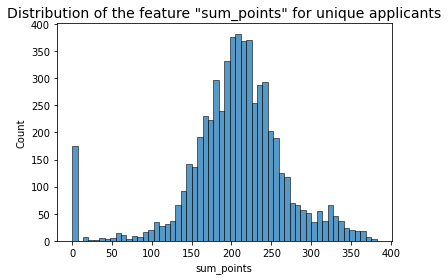

In [39]:
sns.histplot(x = 'sum_points', data = df0).set_title('Distribution of the feature "sum_points" for unique applicants',
                                                     fontsize=14);

In [40]:
df0[(df0['sum_points'] == 0) & (df0['nationality']!='RUSSIA')].count()

id                24
sum_points        24
sum_points_ind    24
education         24
region             5
nationality       23
privileges        24
dtype: int64

#### Among the applicants with a zero total score, 24 are foreigners. Perhaps they did not have the opportunity to pass the Unified State Exam. It is possible that the data does not take into account exams conducted by SPbGASU for applicants without Unified State Examination results.

#### Let's check whether there are applicants who graduated from the previous level of education before 2009 (the Unified State Exam was officially introduced in 2009) and did not have the opportunity to pass the Unified State Exam.

In [41]:
df[df['sum_points'] == 0][df['date_end'] < 2009].groupby('id').mean()

<ipython-input-41-8d16e3052bf1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['sum_points'] == 0][df['date_end'] < 2009].groupby('id').mean()


sum_points  sum_points_ind  date_end
id                                               
076-199-346           0               0      2001
141-041-541           0               0      2005

#### Only two applicants with a zero total score graduated from the previous level of education before 2009.
#### Let's check which applicants were born before 1991 (that is, by 2009 they were 18 years old)

In [42]:
df[(df['sum_points'] == 0) & (df['date_birth'] < dt.datetime(1991, 1, 1, 00, 00, 00))].groupby('id').mean()

sum_points  sum_points_ind  date_end
id                                               
015-517-299           0               0      2015
056-941-763           0               0      2018
064-365-128           0               0      2022
076-199-346           0               0      2001
079-505-841           0               0      2022
126-305-216           0               0      2022
134-411-920           0               0      2018
141-041-541           0               0      2005
143-038-022           0               0      2021
150-953-595           0               0      2022

#### 10 applicants with a total score of zero were born before 1991.

In [43]:
birth_before_1991 = df[(df['sum_points'] == 0) & (df['date_birth'] < dt.datetime(1991, 1, 1, 00, 00, 00))] \
[['id', 'date_birth', 'date_end', 'education', 'nationality', 'privileges']]
birth_before_1991.head()

id date_birth  date_end          education nationality  \
28950  143-038-022 1985-10-06      2021  Secondary general         NaN   
28951  143-038-022 1985-10-06      2021  Secondary general         NaN   
28952  143-038-022 1985-10-06      2021  Secondary general         NaN   
28953  143-038-022 1985-10-06      2021  Secondary general         NaN   
28954  143-038-022 1985-10-06      2021  Secondary general         NaN   

               privileges  
28950  On a general basis  
28951  On a general basis  
28952  On a general basis  
28953  On a general basis  
28954  On a general basis

In [44]:
birth_before_1991['year_birth'] = birth_before_1991.date_birth.dt.year.values
birth_before_1991['age_to_end_date'] = (birth_before_1991.date_end - birth_before_1991.year_birth)
birth_before_1991[['id', 'year_birth', 'education', 'date_end', 'age_to_end_date', 'nationality', 'privileges']]. \
groupby('id').max().sort_values('date_end', ascending = False)

year_birth          education  date_end  age_to_end_date  \
id                                                                      
064-365-128        1975  Secondary general      2022               47   
079-505-841        1983  Secondary general      2022               39   
126-305-216        1981  Secondary general      2022               41   
150-953-595        1969  Secondary general      2022               53   
143-038-022        1985  Secondary general      2021               36   
056-941-763        1978  Secondary general      2018               40   
134-411-920        1980  Secondary general      2018               38   
015-517-299        1971  Secondary special      2015               44   
141-041-541        1987  Secondary general      2005               18   
076-199-346        1982  Secondary special      2001               19   

            nationality          privileges  
id                                           
064-365-128      RUSSIA  On a general basis  
079-505-841      RUSSIA  On a general basis  
126-305-216      RUSSIA  On a general basis  
150-953-595      RUSSIA  On a general basis  
143-038-022         NaN  On a general basis  
056-941-763      RUSSIA  On a general basis  
134-411-920      RUSSIA  On a general basis  
015-517-299      RUSSIA  On a general basis  
141-041-541      RUSSIA  On a general basis  
076-199-346      RUSSIA  On a general basis

#### 7 applicants were born between 1969 and 1985, but graduated from school only in 2018 or 2022! At the time of graduation they were between 36 and 53 years old. Even if we assume that they actually graduated from school by this point, they should have passed the Unified State Exam and have data in the total score column. Let's remove these applicants.

In [45]:
delete_id = birth_before_1991[['id', 'year_birth', 'education', 'date_end', 'age_to_end_date', \
                               'nationality', 'privileges']].groupby('id').max().sort_values('date_end', \
                                                                                             ascending = False).index[:7].values
delete_id

array(['064-365-128', '079-505-841', '126-305-216', '150-953-595',
       '143-038-022', '056-941-763', '134-411-920'], dtype=object)

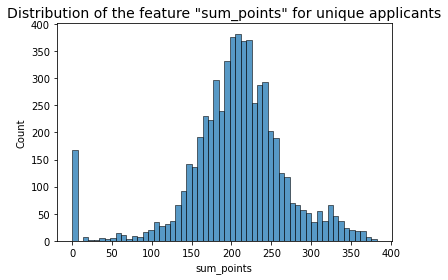

In [46]:
for i in range(7):
    df0.loc[df0['id'] == delete_id[i], 'sum_points'] = np.nan
    
df0 = df0.dropna(subset=['sum_points'])
sns.histplot(x = 'sum_points', data = df0).set_title('Distribution of the feature "sum_points" for unique applicants',
                                                     fontsize=14);

In [47]:
df0.privileges[df.sum_points == 0].value_counts()

On a general basis        146
Having a special right      2
Name: privileges, dtype: int64

#### Let's delete the lines with applicants from Russia without special rights upon admission, who have a zero total score and a year of birth greater than 1991.

In [48]:
birth_after_1991 = df[(df['sum_points'] == 0) & (df['date_birth'] > dt.datetime(1991, 1, 1, 00, 00, 00)) & (df['privileges'] == 'On a general basis') & (df['nationality'] == 'RUSSIA')][['id', 'date_birth', 'date_end', 'education', 'nationality', 'privileges']]
birth_after_1991.groupby('id').max()

date_birth  date_end          education nationality  \
id                                                                
000074598   1998-09-26      2018  Secondary special      RUSSIA   
122-063-302 2002-06-15      2021  Secondary general      RUSSIA   
125-969-706 2002-04-15      2020  Secondary general      RUSSIA   
128-420-873 2000-05-23      2021  Secondary special      RUSSIA   
132-703-967 2001-03-20      2017  Secondary general      RUSSIA   
...                ...       ...                ...         ...   
200-305-045 2005-01-30      2020  Secondary general      RUSSIA   
203-535-525 2003-10-23      2022  Secondary general      RUSSIA   
205-239-583 2003-12-27      2022  Secondary general      RUSSIA   
205-676-859 2004-06-04      2022  Secondary general      RUSSIA   
206-947-011 1999-11-08      2019  Secondary special      RUSSIA   

                     privileges  
id                               
000074598    On a general basis  
122-063-302  On a general basis  
125-969-706  On a general basis  
128-420-873  On a general basis  
132-703-967  On a general basis  
...                         ...  
200-305-045  On a general basis  
203-535-525  On a general basis  
205-239-583  On a general basis  
205-676-859  On a general basis  
206-947-011  On a general basis  

[119 rows x 5 columns]

In [49]:
delete_id_II = birth_after_1991.groupby('id').max().index.values

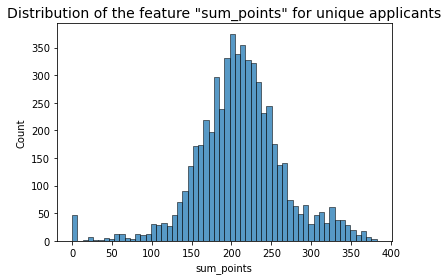

In [50]:
for i in range(119):
    df0.loc[df0['id'] == delete_id_II[i], 'sum_points'] = np.nan

df0 = df0.dropna(subset=['sum_points'])
sns.histplot(x = 'sum_points', data = df0).set_title('Distribution of the feature "sum_points" for unique applicants',
                                                     fontsize=14);

#### The distribution of the 'sum_points' feature for unique applicants is now more similar to normal. Let's delete data about the same applicants on our working dataset:

In [51]:
for i in range(7):
    df.loc[df['id'] == delete_id[i], 'sum_points'] = np.nan

In [52]:
for i in range(119):
    df.loc[df['id'] == delete_id_II[i], 'sum_points'] = np.nan

In [53]:
df.shape

(27762, 20)

In [54]:
df = df.dropna(subset=['sum_points'])

In [55]:
df.shape

(27366, 20)

In [56]:
df.sum_points.isna().sum()

0

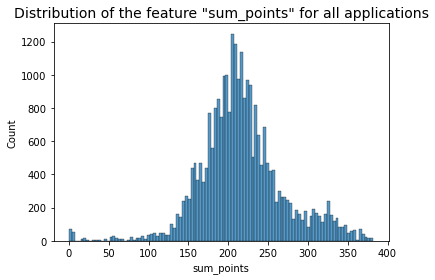

In [57]:
sns.histplot(x = 'sum_points', data = df).set_title('Distribution of the feature "sum_points" for all applications',
                                                    fontsize=14);

#### We also see a bias towards higher values of the total score.
#### From the rules of admission to SPbGASU in 2022, it is known that the maximum number of tests for each of the fields of study accepted based on the results of the Unified State Exam is 3. Therefore, the maximum total score for the Unified State Exam is 300 (since one can score a maximum of 100 points for one Unified State Exam). From the description of the features we know that additional points can be awarded for your own entrance examinations and they are only available at the Faculty of Architecture. Let's check if there are any applicants with a total score greater than 300 who have applied to faculties other than architecture. If there are any, we will delete this data.

In [58]:
df[(df.sum_points>300)&(df['faculty']!='Faculty of Architecture')].count()

id                0
date_app          0
sum_points        0
sum_points_ind    0
consent           0
gender            0
date_birth        0
nationality       0
cost              0
privileges        0
form              0
level             0
profession        0
faculty           0
region            0
education         0
date_end          0
status            0
delivery_doc      0
date_consent      0
dtype: int64

#### All applicants with more than 300 points according to the 'sum_points' feature applied to the Faculty of Architecture. Let's leave this data.

#### Let's process anomalies in the end date of the previous level of education

In [59]:
df.date_end.unique()

array([2022, 2021, 2020, 2019, 2018, 2016, 2017, 2004, 2015, 2013, 2005,
       1900, 2003, 2002, 2014, 2009, 2001], dtype=int64)

In [60]:
df[df['date_end'] == 1900]

id   date_app  sum_points  sum_points_ind consent gender  \
22368  173-400-322 2022-07-10       183.0               0      No   Male   
22370  173-400-322 2022-07-10       183.0               0      No   Male   
22371  173-400-322 2022-07-10       183.0               0      No   Male   
22372  173-400-322 2022-07-10       183.0               0      No   Male   
22375  173-400-322 2022-07-10       183.0               0      No   Male   

      date_birth nationality                cost          privileges  \
22368 2004-06-17      RUSSIA     budgetary basis  On a general basis   
22370 2004-06-17      RUSSIA  full cost recovery  On a general basis   
22371 2004-06-17      RUSSIA     budgetary basis  On a general basis   
22372 2004-06-17      RUSSIA  full cost recovery  On a general basis   
22375 2004-06-17      RUSSIA  full cost recovery  On a general basis   

            form       level                  profession  \
22368  full-time    Bachelor         38.03.02 Management   
22370  full-time    Bachelor            38.03.01 Economy   
22371  full-time    Bachelor            38.03.01 Economy   
22372  full-time    Bachelor         38.03.02 Management   
22375  full-time  Specialist  38.05.01 Economic security   

                                   faculty                 region  \
22368  Faculty of Economics and Management  Saint Petersburg city   
22370  Faculty of Economics and Management  Saint Petersburg city   
22371  Faculty of Economics and Management  Saint Petersburg city   
22372  Faculty of Economics and Management  Saint Petersburg city   
22375  Faculty of Economics and Management  Saint Petersburg city   

               education  date_end     status  \
22368  Secondary general      1900  Submitted   
22370  Secondary general      1900  Submitted   
22371  Secondary general      1900  Submitted   
22372  Secondary general      1900  Submitted   
22375  Secondary general      1900  Submitted   

                                        delivery_doc date_consent  
22368  Superservice "Admission to university online"          NaN  
22370  Superservice "Admission to university online"          NaN  
22371  Superservice "Admission to university online"          NaN  
22372  Superservice "Admission to university online"          NaN  
22375  Superservice "Admission to university online"          NaN

#### There is one applicant (id = '173-400-322') with an anomalous value. We find out the average value for the sample of the difference between the year of completion of the previous level of education and the year of birth and replace the anomalous value with the sum of the resulting difference and the year of birth of this applicant (2004).

In [61]:
df['birth_year'] = df.date_birth.dt.year

In [62]:
print(f'The average value for the sample of the difference between the year of completion of the previous level of education and the year of birth is {round((df.date_end-df.birth_year).mean())} years.')

The average value for the sample of the difference between the year of completion of the previous level of education and the year of birth is 18 years.


In [63]:
print(f'The end date of the previous level of education for the applicant with id = "173-400-322" is {(2004+18)}.')

The end date of the previous level of education for the applicant with id = "173-400-322" is 2022.


In [64]:
df.loc[df['date_end'] == 1900, 'date_end'] = 2022

In [65]:
df.date_end.unique()

array([2022, 2021, 2020, 2019, 2018, 2016, 2017, 2004, 2015, 2013, 2005,
       2003, 2002, 2014, 2009, 2001], dtype=int64)

In [66]:
df = df[['id', 'date_app', 'sum_points', 'sum_points_ind', 'consent', 'gender', 'date_birth', 'nationality', 'cost', 'privileges', 'form', 'level', 'profession', 'faculty', 'region', 'education', 'date_end', 'status', 'delivery_doc', 'date_consent']]

In [67]:
df.head(1)

id   date_app  sum_points  sum_points_ind consent  gender  \
0  154-702-875 2022-07-30       323.0               0      No  Female   

  date_birth nationality             cost              privileges       form  \
0 2004-08-14      RUSSIA  budgetary basis  Having a special right  full-time   

      level               profession                  faculty         region  \
0  Bachelor  07.03.04 Urban planning  Faculty of Architecture  Tatarstan rep   

           education  date_end     status  \
0  Secondary general      2022  Submitted   

                                    delivery_doc date_consent  
0  Superservice "Admission to university online"          NaN

#### Let's work on the date of consent for enrollment

In [68]:
df.date_consent.unique()

array([nan, '30.07.2022 11:41:43', '25.07.2022 12:28:56', ...,
       '07.07.2022 15:02:02', '11.07.2022 11:08:23',
       '06.07.2022 13:06:13'], dtype=object)

In [69]:
(df.date_consent.isna().sum())/(df.shape[0])*100

92.47971935978953

#### The 'Date of consent for enrollment' feature ('date_consent') has 92.5% empty values! Since we do not have data to fill these gaps, we will leave this feature as is. If we need to improve it in the future, we will do so.

#### From the rules for admission to SPbGASU in 2022, it is known that an applicant can simultaneously participate in the competition for Bachelor programs and Specialist programs in one or more specialties and (or) fields of study, the number of which does not exceed 10.

In [70]:
df5 = df.groupby('id').date_app.count()
more_ten_id = df5[df5.values>10].index
print('Total number of unique applicants who submitted more than 10 applications:', len(more_ten_id))
print('Total number of unique applicants:', df5.count())
print('Percentage of unique applicants who submitted more than 10 applications out of the total number of unique applicants:',
      (len(more_ten_id)/df5.count()*100).round(1), '%')
yes_id = df['id'][df['status'] == 'Enrolled'].values
more_ten_yes_id = []
more_ten_no_id = []
for x in more_ten_id:
    if x in yes_id:
        more_ten_yes_id.append(x)
    elif x not in yes_id:
        more_ten_no_id.append(x)
print('Number of applicants who submitted more than 10 applications and were enrolled:', len(more_ten_yes_id))
print('Number of applicants who submitted more than 10 applications and were not enrolled:', len(more_ten_no_id))
print('Total number of enrolled applicants:', df[df['status'] == 'Enrolled'].count()[0])
print('Percentage of unique applicants who submitted more than 10 applications and were enrolled from the total number of enrolled applicants:',
      (len(more_ten_yes_id)*100/df[df['status'] == 'Enrolled'].count()[0]).round(1), '%')

Total number of unique applicants who submitted more than 10 applications: 485
Total number of unique applicants: 5169
Percentage of unique applicants who submitted more than 10 applications out of the total number of unique applicants: 9.4 %
Number of applicants who submitted more than 10 applications and were enrolled: 235
Number of applicants who submitted more than 10 applications and were not enrolled: 250
Total number of enrolled applicants: 1880
Percentage of unique applicants who submitted more than 10 applications and were enrolled from the total number of enrolled applicants: 12.5 %


#### 485 people submitted more than 10 applications! This is 9.4% of all unique applicants! To delete records about 9.4% of all unique applicants, in my opinion, is incorrect in this case, since among them 235 people were enrolled. This is 12.5% of all enrolled applicants.

#### Some applicants had a university degree at the time of application. Let's look at these applications in more detail.

In [71]:
df[df['education'] == 'Higher']

id   date_app  sum_points  sum_points_ind consent  gender  \
1146   177-434-986 2022-06-21       335.0               0      No  Female   
1147   177-434-986 2022-06-21       335.0               0      No  Female   
1148   177-434-986 2022-06-21       335.0               0     Yes  Female   
1149   177-434-986 2022-06-21       335.0               0      No  Female   
3016   166-072-157 2022-06-24       292.0               0      No  Female   
5022   150-420-267 2022-06-20       260.0               0      No  Female   
5023   150-420-267 2022-06-20       260.0               0      No  Female   
5024   150-420-267 2022-06-20       260.0               0      No  Female   
5025   150-420-267 2022-06-20       260.0               0      No  Female   
12429  194-760-856 2022-07-07       219.0               0      No    Male   
12431  194-760-856 2022-07-07       219.0               0      No    Male   
12432  194-760-856 2022-07-07       219.0               0      No    Male   
12436  194-760-856 2022-07-07       219.0               0      No    Male   
12437  194-760-856 2022-07-07       219.0               0      No    Male   
16340  155-898-693 2022-07-04       206.0               0      No  Female   
16341  155-898-693 2022-07-04       206.0               0      No  Female   
16342  155-898-693 2022-07-04       206.0               0      No  Female   
16343  155-898-693 2022-07-04       206.0               0      No  Female   
16344  155-898-693 2022-07-04       206.0               0      No  Female   
16345  155-898-693 2022-07-04       206.0               0      No  Female   
16346  155-898-693 2022-07-04       206.0               0      No  Female   
17525  187-502-801 2022-07-07       202.0               0      No    Male   
20564  178-313-738 2022-07-13       191.0               0      No    Male   
20565  178-313-738 2022-07-21       191.0               0      No    Male   
20566  178-313-738 2022-07-13       191.0               0     Yes    Male   
20744  206-305-369 2022-08-15       190.0               0      No    Male   
20745  206-305-369 2022-08-15       190.0               0      No    Male   
20746  206-305-369 2022-08-15       190.0               0      No    Male   
20747  206-305-369 2022-08-15       190.0               0      No    Male   
20749  206-305-369 2022-08-15       190.0               0      No    Male   
27254  165-893-357 2022-07-05       146.0               0      No  Female   
27255  165-893-357 2022-07-05       146.0               0      No  Female   
27256  165-893-357 2022-07-05       146.0               0      No  Female   
27257  165-893-357 2022-07-05       146.0               0      No  Female   
27290  192-705-306 2022-07-12       146.0               0      No    Male   
27291  192-705-306 2022-07-12       146.0               0      No    Male   
27606    000055751 2022-07-28       140.0               0     Yes    Male   
28195  178-313-738 2022-07-21       122.0               0      No    Male   
28491  140-334-465 2022-07-04       100.0               0      No  Female   

      date_birth   nationality                cost          privileges  \
1146  1999-09-23        RUSSIA  full cost recovery  On a general basis   
1147  1999-09-23        RUSSIA  full cost recovery  On a general basis   
1148  1999-09-23        RUSSIA  full cost recovery  On a general basis   
1149  1999-09-23        RUSSIA  full cost recovery  On a general basis   
3016  2004-06-11        RUSSIA  full cost recovery  On a general basis   
5022  1992-09-05        RUSSIA  full cost recovery  On a general basis   
5023  1992-09-05        RUSSIA  full cost recovery  On a general basis   
5024  1992-09-05        RUSSIA  full cost recovery  On a general basis   
5025  1992-09-05        RUSSIA  full cost recovery  On a general basis   
12429 2004-03-26        RUSSIA  full cost recovery  On a general basis   
12431 2004-03-26        RUSSIA  full cost recovery  On a general basis   
12432 2004-03-26        RUSSIA  full cost recov

#### Among the applications submitted through the State Services portal, there are those in which an error was probably made. It is unlikely that by the age of 18 a person had completed higher education. These applications generally have a "Withdrawn" or "Dropped out of the competition" status. Let's delete them.

In [72]:
df.loc[(df['id'] == '194-760-856 19') & (df['status'] == 'Withdrawn'), 'status'] = np.nan
df.loc[(df['id'] == '166-072-157 61') & (df['status'] == 'Withdrawn'), 'status'] = np.nan
df.loc[(df['id'] == '155-898-693 46') & (df['status'] == 'Withdrawn'), 'status'] = np.nan
df.loc[(df['id'] == '187-502-801 84') & (df['status'] == 'Withdrawn'), 'status'] = np.nan
df.loc[(df['id'] == '165-893-357 21') & (df['status'] == 'Withdrawn'), 'status'] = np.nan
df.loc[(df['id'] == '192-705-306 71') & (df['status'] == 'Dropped out of the competition'), 'status'] = np.nan

In [73]:
df = df.dropna(subset=['status'])

#### The applicant with id  = '178-313-738' was born in 2004. At the time of application, he was almost 18 years old, but, judging by the data, he had already received one higher education. This seems like an anomaly, however, this applicant was enrolled. Let's leave information about this applicant; perhaps he is a unique prodigy.

## <span style="color:green"> $\checkmark$ </span> 4. Report (part 1: General information about the admissions campaign)

### <span style="color:blue"> $\checkmark$ </span> 4.1 Start and end date for accepting documents

In [74]:
a = df.date_app.sort_values()
a

28714   2022-06-20
28680   2022-06-20
28681   2022-06-20
17386   2022-06-20
28682   2022-06-20
           ...    
26107   2022-08-29
17718   2022-08-30
6445    2022-08-31
27940   2022-08-31
27943   2022-08-31
Name: date_app, Length: 27366, dtype: datetime64[ns]

In [75]:
print('Start date for accepting documents:', a.iloc[0].date().strftime(format = '%d.%m.%Y'))

Start date for accepting documents: 20.06.2022


In [76]:
print('End date for accepting documents:', a.iloc[-1].date().strftime(format = '%d.%m.%Y'))

End date for accepting documents: 31.08.2022


#### From the rules of admission to SPbGASU in 2022, it is known that on August 30 - 31, 2022, the enrollment stage is held, at which the admission of persons applying based on the results of entrance examinations to places under contracts for the provision of paid educational services in fileds of study or specialty is carried out (except for fileds of study 07.03.01 "Architecture", 07.03.02 "Reconstruction and restoration of architectural heritage", 07.03.03 "Design of architectural environment", 07.03.04 "Urban planning", 35.03.10 "Landscape architecture"): – August 30, 2022 is the completion date for accepting applications for consent to enrollment from persons subject to enrollment at this stage.
#### That is, the date we received as the closing date for accepting documents does not agree with this information. However, the admission rules also contain the following clarification: “If after completion of enrollment there are unfilled places, SPbGASU may, on the basis of competitive lists, conduct additional enrollment for the specified places.”
#### We can check whether applicants who submitted documents on August 31, 2022 were able to enroll.

In [77]:
df[df.date_app=='2022-08-31'].status.value_counts()

Submitted    2
Enrolled     1
Name: status, dtype: int64

In [78]:
df[(df.date_app=='2022-08-31') & (df.status == 'Enrolled')]

id   date_app  sum_points  sum_points_ind consent  gender  \
6445  169-272-125 2022-08-31       247.0               0     Yes  Female   

     date_birth nationality                cost          privileges  \
6445 2001-10-14      RUSSIA  full cost recovery  On a general basis   

           form     level              profession  \
6445  full-time  Bachelor  40.03.01 Jurisprudence   

                                                faculty  \
6445  Faculty of Forensics and Law in Construction a...   

                     region          education  date_end    status  \
6445  Saint Petersburg city  Secondary general      2019  Enrolled   

     delivery_doc         date_consent  
6445          Web  31.08.2022 14:22:51

#### One lucky applicant!

### Conclusion: start date for accepting documents - 20.06.2022, end date for accepting documents - 31.08.2022

### <span style="color:blue"> $\checkmark$ </span> 4.2 Number of applications, including by faculties and fields of study

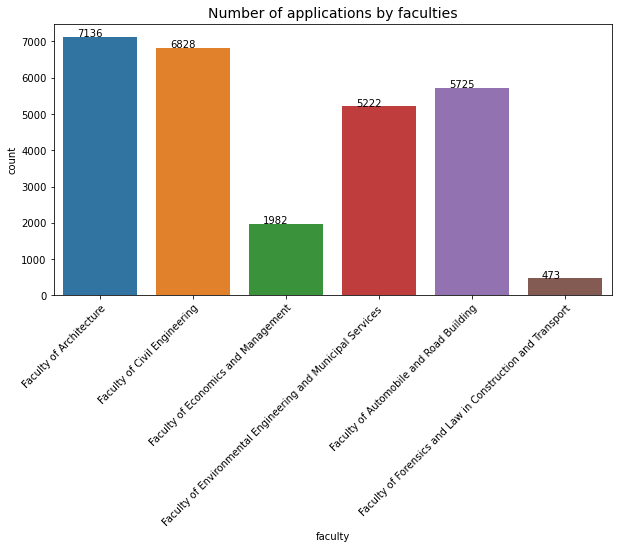

In [79]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'faculty', data = df)
ax.set_title('Number of applications by faculties', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

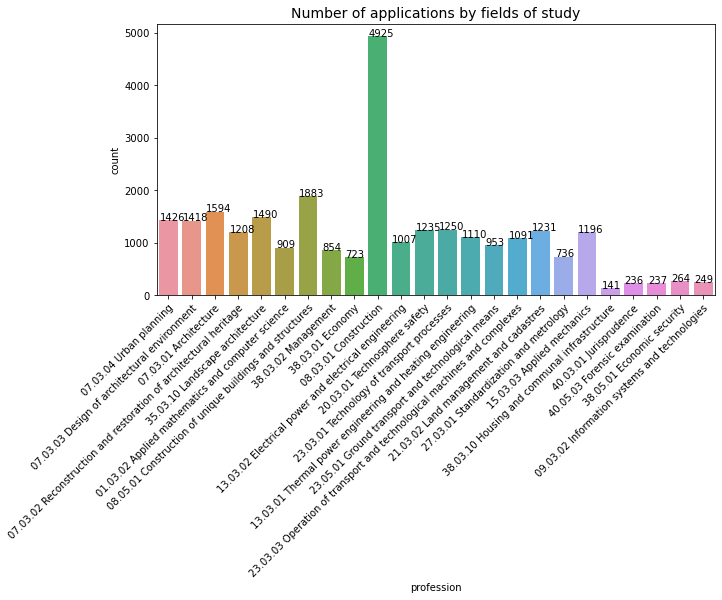

In [80]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'profession', data = df)
ax.set_title('Number of applications by fields of study', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.02, p.get_height()+0.1))

In [81]:
fac_prof_count = df[['faculty', 'profession']]
fac_prof_count
faculty_name = []
profession_name = []
profession_count = []
for j in range(len(fac_prof_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False))):
    faculty_name.append(fac_prof_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False).index[j][1])
    profession_name.append(fac_prof_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False).index[j][0])
    profession_count.append(fac_prof_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False).values[j])
FP_count = pd.DataFrame({
     'faculty_name': faculty_name,
     'profession_name': profession_name,
     'profession_count': profession_count
})
FP_count.head(1)

faculty_name        profession_name  profession_count
0  Faculty of Civil Engineering  08.03.01 Construction              3051

In [82]:
fig = px.treemap(FP_count,
                 path=['faculty_name', 'profession_name'],
                 values='profession_count',
                 title='Distribution by popularity of fields of study among faculties',
                 color='profession_count',
                 color_continuous_scale='RdBu')
fig.data[0].textinfo = 'label+value+percent parent'
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

fig.show()

### Conclusion: 
### The most popular faculties are Faculty of Architecture and Faculty of Civil Engineering. The next most popular are Faculty of Environmental Engineering and Municipal Services and Faculty of Automobile and Road Building. Faculty of Forensics and Law in Construction and Transport is the most unclaimed. 
#### Perhaps this is one of the reasons for the luck of the applicant, who submitted documents the day before the start of her studies.
### The most popular specialty at SPbGASU in 2022 - "Construction". Number of applications for this specialty - 4925! However, specialists in this specialty are trained at two different faculties: at the Faculty of Civil Engineering (3051 applications) and at the Faculty of Environmental Engineering and Municipal Services (1874 applications). The most unpopular fields of study - "Housing and communal infrastructure", "Jurisprudence", "Forensic examination", "Economic security", "Information systems and technologies".¶

### <span style="color:blue"> $\checkmark$ </span> 4.3 Number of unique applicants

In [83]:
len(df.id.unique())

5169

### Conclusion: number of unique applicants - 5169.

### <span style="color:blue"> $\checkmark$ </span> 4.4 Number of applications per applicant, average, median

In [84]:
df2 = pd.DataFrame({
     'id_unique': df.groupby('id').date_app.count().index,
     'number_of_app': df.groupby('id').date_app.count().values
})
df2.sort_values('number_of_app')

id_unique  number_of_app
1474  160-162-855              1
2533  166-856-063              1
3651  173-620-302              1
634   146-206-709              1
3650  173-617-864              1
...           ...            ...
4742  195-817-608             23
62      000096124             26
2821  168-054-006             26
4532  190-622-343             30
85      000096291             33

[5169 rows x 2 columns]

In [85]:
df2.describe()

number_of_app
count    5169.000000
mean        5.294254
std         4.040369
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        33.000000

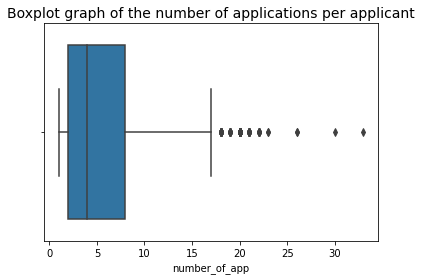

In [86]:
sns.boxplot(x=df2["number_of_app"]).set_title('Boxplot graph of the number of applications per applicant', fontsize=14);

### Conclusion: the average number of applications per applicant is 5.3. The median is 4. The difference is due to the presence of high values in the number of applications, which we identified earlier. These high values are especially visible in the boxplot.


### <span style="color:blue"> $\checkmark$ </span> 4.5 Distribution by methods of submitting documents

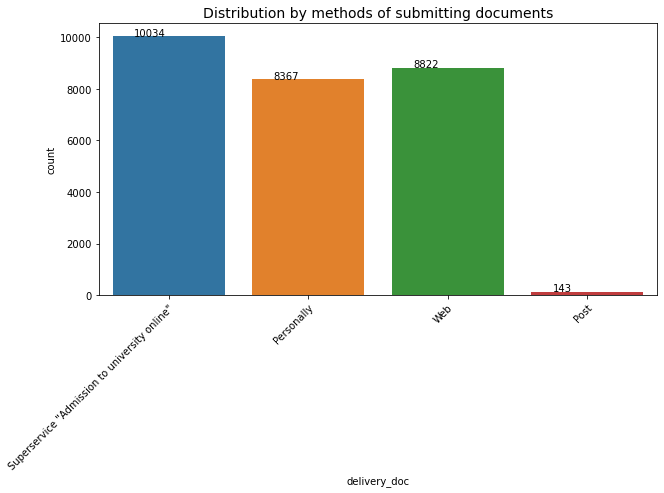

In [87]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'delivery_doc', data = df)
ax.set_title('Distribution by methods of submitting documents', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

### Conclusion: the predominant number of applications were submitted through the “Admission to university online” Superservice. Also popular methods are submission through a Personal Account on the SPbGASU website and personal submission of documents. The most unpopular method of submitting documents is by mail.

### <span style="color:blue"> $\checkmark$ </span> 4.6 Distribution by reasons for admission, levels of education, types of education

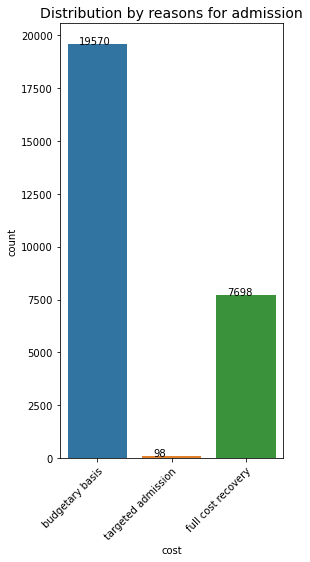

In [88]:
plt.figure(figsize=(4,8))
ax = sns.countplot(x = 'cost', data = df)
ax.set_title('Distribution by reasons for admission', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

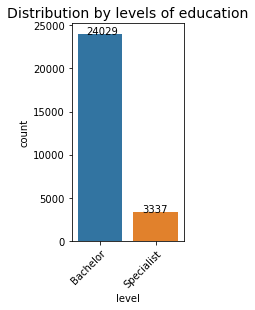

In [89]:
plt.figure(figsize=(2,4))
ax = sns.countplot(x = 'level', data = df)
ax.set_title('Distribution by levels of education', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

### Let's look at the distribution by types of education among unique applicants

In [90]:
df3 = df[['id', 'education', 'region', 'nationality']]
df3 = df3.drop_duplicates()
df3 = df3.set_index('id')
df3

education                                       region  \
id                                                                            
154-702-875  Secondary general                                Tatarstan rep   
165-530-013  Secondary general                        Saint Petersburg city   
200-853-207  Secondary general                        Saint Petersburg city   
000096659    Secondary special  Khanty-Mansiysk Autonomous Okrug - Yugra ao   
153-354-557  Secondary general                                 Mordovia rep   
...                        ...                                          ...   
000104395    Secondary special                                          NaN   
175-600-814  Secondary special                                 Kalmykia rep   
000097718    Secondary general                        Saint Petersburg city   
141-041-541  Secondary general                        Saint Petersburg city   
000102250    Secondary general                                          NaN   

              nationality  
id                         
154-702-875        RUSSIA  
165-530-013        RUSSIA  
200-853-207        RUSSIA  
000096659          RUSSIA  
153-354-557        RUSSIA  
...                   ...  
000104395      UZBEKISTAN  
175-600-814         CHINA  
000097718    SAUDI ARABIA  
141-041-541        RUSSIA  
000102250      TAJIKISTAN  

[5171 rows x 3 columns]

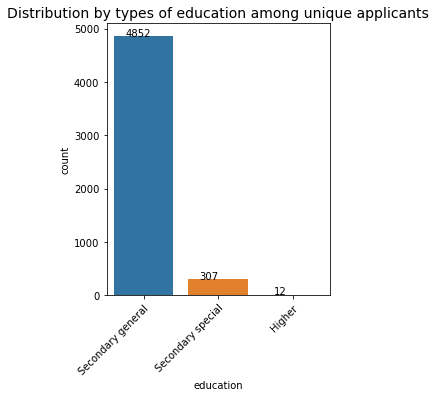

In [91]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x = 'education', data = df3)
ax.set_title('Distribution by types of education among unique applicants', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

### Conclusion: the overwhelming majority of applicants have a secondary general education at the time of admission and are applying to enroll in a bachelor’s training program at the expense of the federal budget.

### <span style="color:blue"> $\checkmark$ </span> 4.7 Distribution by region, citizenship

### Let's visualize the distribution by region and citizenship for unique applicants

In [92]:
reg_count = pd.DataFrame({
     'region_name': df3.region.value_counts().index,
     'region_count': df3.region.value_counts().values
})
nat_count = pd.DataFrame({
     'nation_name': df3.nationality.value_counts().index,
     'nation_count': df3.nationality.value_counts().values
})

In [93]:
fig = px.treemap(reg_count, path=['region_name'], values='region_count', color='region_name', 
                 title='Distribution by region for unique applicants')
fig.data[0].textinfo = 'label+value+percent parent'
fig.show()

#### Curious, is there any connection between the number of applications for the regions of Russia and the standard of living in the regions?

#### Rating of Russian regions by standard of living (data for 2021):

In [94]:
tables = pd.read_html('https://top-rf.ru/places/110-rejting-regionov.html')
raiting_regions = tables[1]

for i in range(2,11):
    tables = pd.read_html('https://top-rf.ru/places/110-rejting-regionov.html')
    raiting_regions = pd.concat([raiting_regions, tables[i]], ignore_index=True)

raiting_regions.head()

0                1              2           3
0  №       Субъект РФ  Итоговый балл  № в 2021г.
1  1           Москва          82999           1
2  2  Санкт-Петербург          82307           2
3  3  Московская обл.          78195           3
4  4  Респ. Татарстан          72113           4

In [95]:
raiting_regions.rename(columns = {0:'No. in 2021', 1:'Region', 2:'Rating score in 2021', 3:'3'}, inplace = True )
raiting_regions = raiting_regions.loc[1:]
raiting_regions = raiting_regions.drop(['3'], axis='columns')
TOP_15_regions = raiting_regions.loc[:15]

In [96]:
def translate_region(rus, eng):
    TOP_15_regions.Region = TOP_15_regions.Region.str.replace(rus, eng)

In [97]:
translate_region('Москва', 'Moscow city')
translate_region('Санкт-Петербург', 'Saint Petersburg city')
translate_region('Московская обл.', 'Moscow reg')
translate_region('Респ. Татарстан', 'Tatarstan rep')
translate_region('Краснодарский край', 'Krasnodar reg')
translate_region('Белгородская обл.', 'Belgorod reg')
translate_region('Ленинградская обл.', 'Leningrad reg')
translate_region('Калининградская обл.', 'Kaliningrad reg')
translate_region('Ханты-Мансийский авт. окр. — Югра', 'Khanty-Mansiysk ao — Yugra')
translate_region('Самарская обл.', 'Samara reg')
translate_region('Воронежская обл.', 'Voronezh reg')
translate_region('Нижегородская обл.', 'Nizhny Novgorod reg')
translate_region('Калужская обл.', 'Kaluga reg')
translate_region('Свердловская обл.', 'Sverdlovsk reg')
translate_region('Ростовская обл.', 'Rostov reg')

C:\Users\User\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-9af44c46a56e>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [98]:
fig = px.bar(TOP_15_regions, x='Region', y='Rating score in 2021', text='Rating score in 2021',
             color='Rating score in 2021')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(height=700, width = 1000, title='Rating of Russian regions by standard of living (TOP-15) (data for 2021)')
fig.show()

#### Regions with the highest standard of living are located in the Central, Northwestern, Southern, Volga, and Ural federal districts. Previously, we found that it was from these federal districts, with the exception of the Central District, that the largest number of applications for admission were received.

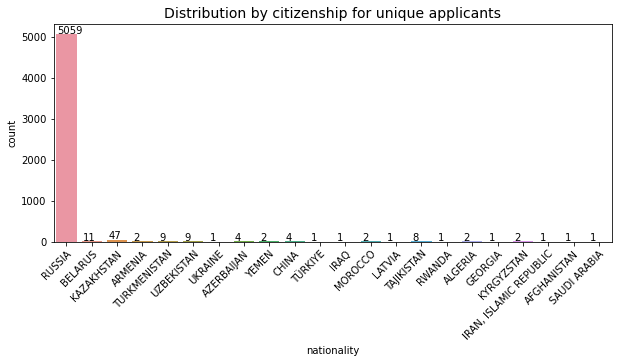

In [99]:
plt.figure(figsize=(10,4))
ax = sns.countplot(x = 'nationality', data = df3)
ax.set_title('Distribution by citizenship for unique applicants', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.05, p.get_height()+10))

### Conclusion: the vast majority of applicants have Russian citizenship. Among foreign countries, SPbGASU is most often considered for admission by applicants from neighboring countries: Kazakhstan, Belarus, Turkmenistan, Uzbekistan and Tajikistan.
### Almost a third of all applicants have a residence permit in St. Petersburg, 2/3 of all those wishing to enroll in SPbGASU are ready to come to St. Petersburg for all their studies from other regions. Consequently, SPbGASU is famous in many regions and attracts applicants from all over the country.

### <span style="color:blue"> $\checkmark$ </span> 4.8 Number of consents in fields of study before the publication of competition lists

#### Now it's time to work with the last column 'Date of consent to enrollment' ('date_consent'). To work, we can select all non-null values and convert their data type.

In [100]:
df4 = df[df['date_consent'].notnull()]

In [101]:
df4['date_consent'] = pd.to_datetime(df4['date_consent'], 
                              format = '%d.%m.%Y %H:%M:%S')

<ipython-input-101-a61cc1c78380>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 2 to 28730
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              2058 non-null   object        
 1   date_app        2058 non-null   datetime64[ns]
 2   sum_points      2058 non-null   float64       
 3   sum_points_ind  2058 non-null   int64         
 4   consent         2058 non-null   object        
 5   gender          2058 non-null   object        
 6   date_birth      2058 non-null   datetime64[ns]
 7   nationality     2057 non-null   object        
 8   cost            2058 non-null   object        
 9   privileges      2058 non-null   object        
 10  form            2058 non-null   object        
 11  level           2058 non-null   object        
 12  profession      2058 non-null   object        
 13  faculty         2058 non-null   object        
 14  region          2004 non-null   object        
 15  edu

In [103]:
df4.head(3)

id   date_app  sum_points  sum_points_ind consent  gender  \
2  154-702-875 2022-07-30       323.0               0     Yes  Female   
7  165-530-013 2022-07-04       301.0               0     Yes  Female   
9  200-853-207 2022-06-22       295.0               0     Yes  Female   

  date_birth nationality             cost              privileges       form  \
2 2004-08-14      RUSSIA  budgetary basis  Having a special right  full-time   
7 2004-10-22      RUSSIA  budgetary basis  Having a special right  full-time   
9 2003-12-31      RUSSIA  budgetary basis  Having a special right  full-time   

      level                                         profession  \
2  Bachelor                              07.03.01 Architecture   
7  Bachelor                              07.03.01 Architecture   
9  Bachelor  07.03.02 Reconstruction and restoration of arc...   

                   faculty                 region          education  \
2  Faculty of Architecture          Tatarstan rep  Secondary general   
7  Faculty of Architecture  Saint Petersburg city  Secondary general   
9  Faculty of Architecture  Saint Petersburg city  Secondary general   

   date_end    status                                   delivery_doc  \
2      2022  Enrolled  Superservice "Admission to university online"   
7      2022  Enrolled                                     Personally   
9      2021  Enrolled                                     Personally   

         date_consent  
2 2022-07-30 11:41:43  
7 2022-07-25 12:28:56  
9 2022-07-25 13:06:48

#### The competition lists were published on July 27, 2022. Let's look at the distribution of consents to enrollment by fields of study until this day.

In [104]:
date_pub = dt.datetime(2022, 7, 27, 00, 00, 00)
date_pub

datetime.datetime(2022, 7, 27, 0, 0)

In [105]:
df4['consent_before_pub'] = [0 for i in range(df4.shape[0])]

<ipython-input-105-d45db7daf32b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
df4.head(1)

id   date_app  sum_points  sum_points_ind consent  gender  \
2  154-702-875 2022-07-30       323.0               0     Yes  Female   

  date_birth nationality             cost              privileges  ...  \
2 2004-08-14      RUSSIA  budgetary basis  Having a special right  ...   

      level             profession                  faculty         region  \
2  Bachelor  07.03.01 Architecture  Faculty of Architecture  Tatarstan rep   

           education date_end    status  \
2  Secondary general     2022  Enrolled   

                                    delivery_doc        date_consent  \
2  Superservice "Admission to university online" 2022-07-30 11:41:43   

  consent_before_pub  
2                  0  

[1 rows x 21 columns]

In [107]:
df4.loc[df4['date_consent'] < date_pub, 'consent_before_pub'] = 1

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
df4.head()

id   date_app  sum_points  sum_points_ind consent  gender  \
2   154-702-875 2022-07-30       323.0               0     Yes  Female   
7   165-530-013 2022-07-04       301.0               0     Yes  Female   
9   200-853-207 2022-06-22       295.0               0     Yes  Female   
12    000096659 2022-07-20       288.0               0     Yes    Male   
16  153-354-557 2022-07-30       288.0               5     Yes  Female   

   date_birth nationality             cost              privileges  ...  \
2  2004-08-14      RUSSIA  budgetary basis  Having a special right  ...   
7  2004-10-22      RUSSIA  budgetary basis  Having a special right  ...   
9  2003-12-31      RUSSIA  budgetary basis  Having a special right  ...   
12 2000-01-23      RUSSIA  budgetary basis  Having a special right  ...   
16 2004-08-05      RUSSIA  budgetary basis  Having a special right  ...   

       level                                         profession  \
2   Bachelor                              07.03.01 Architecture   
7   Bachelor                              07.03.01 Architecture   
9   Bachelor  07.03.02 Reconstruction and restoration of arc...   
12  Bachelor                    35.03.10 Landscape architecture   
16  Bachelor                              07.03.01 Architecture   

                    faculty                                       region  \
2   Faculty of Architecture                                Tatarstan rep   
7   Faculty of Architecture                        Saint Petersburg city   
9   Faculty of Architecture                        Saint Petersburg city   
12  Faculty of Architecture  Khanty-Mansiysk Autonomous Okrug - Yugra ao   
16  Faculty of Architecture                                 Mordovia rep   

            education date_end    status  \
2   Secondary general     2022  Enrolled   
7   Secondary general     2022  Enrolled   
9   Secondary general     2021  Enrolled   
12  Secondary special     2020  Enrolled   
16  Secondary general     2022  Enrolled   

                                     delivery_doc        date_consent  \
2   Superservice "Admission to university online" 2022-07-30 11:41:43   
7                                      Personally 2022-07-25 12:28:56   
9                                      Personally 2022-07-25 13:06:48   
12                                            Web 2022-07-27 16:45:04   
16  Superservice "Admission to university online" 2022-07-30 13:32:33   

   consent_before_pub  
2                   0  
7                   1  
9                   1  
12                  0  
16                  0  

[5 rows x 21 columns]

In [109]:
consent_before = df4[['profession', 'consent_before_pub']][df4['consent_before_pub'] == 1]. \
groupby('profession').count().sort_values('consent_before_pub', ascending=False).reset_index()

### Number of consents in fileds of study before the publication of competition lists:

In [110]:
consent_before

profession  consent_before_pub
0                               08.03.01 Construction                 155
1   08.05.01 Construction of unique buildings and ...                  70
2                               07.03.01 Architecture                  46
3                              40.03.01 Jurisprudence                  44
4                       40.05.03 Forensic examination                  41
5                                 38.03.02 Management                  41
6                                    38.03.01 Economy                  41
7                          38.05.01 Economic security                  33
8   07.03.02 Reconstruction and restoration of arc...                  25
9        07.03.03 Design of architectural environment                  23
10                            07.03.04 Urban planning                  23
11                    35.03.10 Landscape architecture                  20
12             21.03.02 Land management and cadastres                  10
13  23.03.03 Operation of transport and technologi...                   9
14                         15.03.03 Applied mechanics                   7
15         23.03.01 Technology of transport processes                   6
16                       20.03.01 Technosphere safety                   6
17      09.03.02 Information systems and technologies                   6
18  23.05.01 Ground transport and technological means                   5
19  01.03.02 Applied mathematics and computer science                   5
20  13.03.01 Thermal power engineering and heating...                   2
21             27.03.01 Standardization and metrology                   1
22  13.03.02 Electrical power and electrical engin...                   1
23       38.03.10 Housing and communal infrastructure                   1

In [111]:
fig = px.treemap(consent_before, path=['profession'], values='consent_before_pub', color='profession',
                 title= 'Distribution of consents to enrollment by fileds of study before the publication of competitive lists')
fig.data[0].textinfo = 'label+value+percent parent'
fig.show()

In [112]:
fig = px.pie(
    consent_before, values='consent_before_pub', names='profession',
    hole=0.5
)
fig.update_layout(height=1000,
                  title='Percentage of consents to enrollment in fileds of study before the publication of competitive lists')
fig.show()

#### Most often, applicants signed consent for enrollment before the publication of competitive lists in the field of study "Construction" (the number of consents was 155).
#### From the above graphs one can see that in unpopular fields of study, such as Jurisprudence, Forensic examination and Economic security, SPbGASU is a higher priority educational institution than in such popular fields of study as, for example, Urban planning, Landscape architecture, Design of architectural environment. 
#### Let's look at the percentage of acceptance before enrollment to the total number of applications in various fields of study:

In [113]:
new_df = FP_count
new_df_1 = consent_before
res = (new_df.set_index('profession_name')[['faculty_name', 'profession_count']]. \
       join(new_df_1.set_index('profession')[['consent_before_pub']], how='inner').reset_index())
res['percent_consent_before'] = (res['consent_before_pub'] *100 / res['profession_count']).round(2)
res.sort_values('percent_consent_before', ascending = False)

index  \
23                             40.03.01 Jurisprudence   
24                      40.05.03 Forensic examination   
22                         38.05.01 Economic security   
6                               08.03.01 Construction   
19                                   38.03.01 Economy   
5                               08.03.01 Construction   
20                                38.03.02 Management   
7   08.05.01 Construction of unique buildings and ...   
1                               07.03.01 Architecture   
8       09.03.02 Information systems and technologies   
2   07.03.02 Reconstruction and restoration of arc...   
3        07.03.03 Design of architectural environment   
4                             07.03.04 Urban planning   
18                    35.03.10 Landscape architecture   
15  23.03.03 Operation of transport and technologi...   
13             21.03.02 Land management and cadastres   
21       38.03.10 Housing and communal infrastructure   
11                         15.03.03 Applied mechanics   
0   01.03.02 Applied mathematics and computer science   
16  23.05.01 Ground transport and technological means   
12                       20.03.01 Technosphere safety   
14         23.03.01 Technology of transport processes   
9   13.03.01 Thermal power engineering and heating...   
17             27.03.01 Standardization and metrology   
10  13.03.02 Electrical power and electrical engin...   

                                         faculty_name  profession_count  \
23  Faculty of Forensics and Law in Construction a...               236   
24  Faculty of Forensics and Law in Construction a...               237   
22                Faculty of Economics and Management               264   
6   Faculty of Environmental Engineering and Munic...              1874   
19                Faculty of Economics and Management               723   
5                        Faculty of Civil Engineering              3051   
20                Faculty of Economics and Management               854   
7                        Faculty of Civil Engineering              1883   
1                             Faculty of Architecture              1594   
8                        Faculty of Civil Engineering               249   
2                             Faculty of Architecture              1208   
3                             Faculty of Architecture              1418   
4                             Faculty of Architecture              1426   
18                            Faculty of Architecture              1490   
15            Faculty of Automobile and Road Building              1091   
13  Faculty of Environmental Engineering and Munic...              1231   
21                Faculty of Economics and Management               141   
11            Faculty of Automobile and Road Building              1196   
0                        Faculty of Civil Engineering               909   
16            Faculty of Automobile and Road Building               953   
12            Faculty of Automobile and Road Building              1235   
14            Faculty of Automobile and Road Building              1250   
9   Faculty of Environmental Engineering and Munic...              1110   
17                       Faculty of Civil Engineering               736   
10  Faculty of Environmental Engineering and Munic...              1007   

    consent_before_pub  percent_consent_before  
23                  44                   18.64  
24                  41                   17.30  
22                  33                   12.50  
6                  155                    8.27  
19                  41                    5.67  
5                  155                    5.08  
20                  41                    4.80  
7                   70                    3.72  
1                   46                    2.89  
8                    6                    2.41  
2                   25                    2.07  
3                   23    

In [114]:
fig = px.bar(res, y='percent_consent_before', x='index', text_auto='.2s',
            title="Percentage of consents before publication of competition lists to the total number of applications")
fig.update_layout(height=700, width = 1000)
fig.show()

### Conclusion: the largest number of consents before the publication of competition lists in 2022 was given in the following fields of study: Construction (155 consents), Construction of unique buildings and structures (70), Architecture (46). However, if one pay attention to their relative number to the total number of applications for various specialties, one can note that applicants who applied for these areas also considered other universities for admission. When applying for unpopular areas of study, such as Jurisprudence, Forensic examination and Economic security, SPbGASU is a higher priority educational institution than in such popular areas as, for example, Urban planning, Landscape architecture, Design of architectural environment. 

## <span style="color:green"> $\checkmark$ </span> 5. Intermediate conclusion

### Based on the purpose of this analysis “to correctly build a strategy for working with applicants and become a real pole of talent attraction”:
### The main interest of SPbGASU applicants in 2022 is related to the Faculty of Construction and Architecture, which is consistent with the main focus of the university. However, most applicants do not reside permanently in St. Petersburg. Perhaps this is one of the reasons for applicants’ uncertainty about the priority of SPbGASU for admission.
---
### *The illustration below confirms this assumption. 50% of applicants who are confident in their intention to enter SPbGASU live in St. Petersburg, another almost 10% live in the Leningrad region.*

In [115]:
df6 = df4[['region', 'consent_before_pub']][df4['consent_before_pub'] == 1]. \
groupby('region').count().sort_values('consent_before_pub', ascending=False).reset_index()
df6.head()

region  consent_before_pub
0  Saint Petersburg city                 307
1          Leningrad reg                  61
2          Krasnodar reg                  13
3            Irkutsk reg                  11
4          Stavropol reg                  11

In [116]:
fig = px.pie(
    df6, values='consent_before_pub', names='region',
    hole=0.5
)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update_layout(height=500,
                  title='Percentage of consents to enrollment by region before the publication of competitive lists')
fig.show()

## <span style="color:green"> $\checkmark$ </span> 6. Report (part 2: Portrait of an applicant)

### <span style="color:blue"> $\checkmark$ </span> 6.1 Portrait of an applicant: gender, age, where he studied, where he lives (St. Petersburg or the regions, maybe some region is more active on average), what fields of study he chose (i.e. the most popular fields of study), how many applications he submitted, which way, what are his entrance test scores. What else important can be said about him?

#### Average total score:

In [117]:
df_sum_points = df[['id', 'sum_points', 'sum_points_ind']]
df_sum_points = df_sum_points.drop_duplicates()
df_sum_points.head(3)

id  sum_points  sum_points_ind
0  154-702-875       323.0               0
4  165-530-013       301.0               0
8  200-853-207       295.0               0

In [118]:
print('Average total score:', round(df_sum_points.sum_points.mean()))

Average total score: 211


#### Gender distribution:

In [119]:
df_portrait = df[['id', 'date_birth', 'gender', 'region', 'nationality', 'education']]
df_portrait = df_portrait.drop_duplicates()
df_portrait.head(3)

id date_birth  gender                 region nationality  \
0  154-702-875 2004-08-14  Female          Tatarstan rep      RUSSIA   
4  165-530-013 2004-10-22  Female  Saint Petersburg city      RUSSIA   
8  200-853-207 2003-12-31  Female  Saint Petersburg city      RUSSIA   

           education  
0  Secondary general  
4  Secondary general  
8  Secondary general

In [120]:
df_portrait.gender.value_counts()

Female    2730
Male      2441
Name: gender, dtype: int64

#### Average age:

In [121]:
df_portrait['age'] = (2022 - df_portrait.date_birth.dt.year)
print('Average age of applicant:', round(df_portrait['age'].mean()))

Average age of applicant: 18


## Conclusion:  
### 1. 18-year-old applicant (more likely female) from one of the following federal districts: Northwestern (St. Petersburg, Leningrad, Arkhangelsk, Vologda, Murmansk region) / Southern (Krasnodar region) / Volga  (Tatarstan, Bashkortostan or Samara region) / Ural (Khanty-Mansiysk Autonomous Okrug), has a general secondary education, submitted an average of 5 applications through the Superservice "Admission to a university online" / in person / through a personal account on the SPbGASU website and wants to enroll at the expense of the federal budget for a training program bachelors, with an average of 211 total points based on the Unified State Examination results.
 
### 2. Among the specialties, applicant is especially attracted to the following fields of study at the Faculty of Construction and the Faculty of Architecture: 08.03.01 Construction, 08.05.01 Construction of unique buildings and structures, 07.03.01 Architecture, 35.03.10 Landscape architecture, 07.03.04 Urban planning, 07.03.03 Design of architectural environment. At the Faculty of Automobile and Road Building and the Faculty of Environmental Engineering and Municipal Services, applicant shows the greatest interest in the following specialties: 08.03.01 Construction, 23.03.01 Technology of transport processes, 20.03.01 Technosphere safety, 21.03.02 Land management and cadastres, 15.03.03 Applied mechanics.  

### 3. SPbGASU is most popular among applicants from the Northwestern Federal District, as well as nearby districts: the Southern Federal District, the Volga Federal District and the Ural Federal District. However, applicants from the neighboring Central Federal District do not show much interest in SPbGASU. Probably, Moscow universities offering similar specialties are good competition for Saint Petersburg State University of Architecture and Civil Engineering. For what reasons this happens is the subject of a separate analysis.



## <span style="color:blue"> $\checkmark$ </span> 6.2 Select 2 categories from the proposed ones and compare their portraits:

### •	Applicant enrolled on a budgetary basis
### •	Applicant enrolled on a target basis
### •	Non-enrolled applicant (please note that only those who were not enrolled in any field of study should be retained)

## Let's compare the portraits of those enrolled on a budgetary basis and non-enrolled applicants.
#### First, we will analyze the data for applicants enrolled on the budget, then for non-enrolled applicants (this part will mainly contain code, including for subsequent visualization). At the end of the report, we will compare both groups (this part will mainly contain visualization).

## Applicant enrolled on a budgetary basis:

In [122]:
df_yes_budget = df[(df['cost'] == 'budgetary basis') & (df['status'] == 'Enrolled')]
df_yes_budget.id.unique()

array(['154-702-875', '165-530-013', '200-853-207', ..., '165-106-670',
       '128-972-346', '187-382-955'], dtype=object)

In [123]:
df_yes = df[df['id'] == df_yes_budget.id.unique()[0]]
for i in range(1,len(df_yes_budget.id.unique())):
    df_temp = df[df['id'] == df_yes_budget.id.unique()[i]]
    df_yes = pd.concat([df_yes, df_temp], ignore_index=True, sort=False)

df_yes['date_consent'][df_yes['date_consent'].notnull()] = pd.to_datetime(df_yes['date_consent'], 
                              format = '%d.%m.%Y %H:%M:%S')
df_yes.head(3)

<ipython-input-123-ec78ada58e91>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id   date_app  sum_points  sum_points_ind consent  gender  \
0  154-702-875 2022-07-30       323.0               0      No  Female   
1  154-702-875 2022-07-30       323.0               0      No  Female   
2  154-702-875 2022-07-30       323.0               0     Yes  Female   

  date_birth nationality             cost              privileges       form  \
0 2004-08-14      RUSSIA  budgetary basis  Having a special right  full-time   
1 2004-08-14      RUSSIA  budgetary basis  Having a special right  full-time   
2 2004-08-14      RUSSIA  budgetary basis  Having a special right  full-time   

      level                                    profession  \
0  Bachelor                       07.03.04 Urban planning   
1  Bachelor  07.03.03 Design of architectural environment   
2  Bachelor                         07.03.01 Architecture   

                   faculty         region          education  date_end  \
0  Faculty of Architecture  Tatarstan rep  Secondary general      2022   
1  Faculty of Architecture  Tatarstan rep  Secondary general      2022   
2  Faculty of Architecture  Tatarstan rep  Secondary general      2022   

      status                                   delivery_doc  \
0  Submitted  Superservice "Admission to university online"   
1  Submitted  Superservice "Admission to university online"   
2   Enrolled  Superservice "Admission to university online"   

          date_consent  
0                  NaN  
1                  NaN  
2  2022-07-30 11:41:43

#### The "df_yes" dataframe contains data on all applications of applicants enrolled on a budgetary basis.

#### Number of applicants enrolled on a budgetary basis:

In [124]:
print(f'Number of applicants enrolled on a budgetary basis: {len(df_yes.id.unique())}.')

Number of applicants enrolled on a budgetary basis: 1144.


#### Average total score:

In [125]:
yes_sum_points = df_yes[['id', 'sum_points', 'sum_points_ind']]
yes_sum_points = yes_sum_points.drop_duplicates()
yes_sum_points.head(3)

id  sum_points  sum_points_ind
0   154-702-875       323.0               0
8   165-530-013       301.0               0
12  200-853-207       295.0               0

In [126]:
print('Average total score:', round(yes_sum_points.sum_points.mean()))

Average total score: 240


In [127]:
df_yes_average_sum = pd.DataFrame({
     'Applicants enrolled on a budgetary basis': yes_sum_points.sum_points.values
})

#### Distribution by gender:

In [128]:
yes_portrait = df_yes[['id', 'date_birth', 'gender', 'region', 'nationality', 'education']]
yes_portrait = yes_portrait.drop_duplicates()
yes_portrait.head(3)

id date_birth  gender                 region nationality  \
0   154-702-875 2004-08-14  Female          Tatarstan rep      RUSSIA   
8   165-530-013 2004-10-22  Female  Saint Petersburg city      RUSSIA   
12  200-853-207 2003-12-31  Female  Saint Petersburg city      RUSSIA   

            education  
0   Secondary general  
8   Secondary general  
12  Secondary general

In [129]:
yes_portrait.groupby('gender').count().reset_index()

gender   id  date_birth  region  nationality  education
0  Female  638         638     621          637        638
1    Male  507         507     494          507        507

#### Average age:

In [130]:
yes_portrait['age'] = (2022 - yes_portrait.date_birth.dt.year)
print('Average age of an applicant:', round(yes_portrait['age'].mean()))

Average age of an applicant: 18


#### Distribution by region of registration:

In [131]:
yes_portrait[['id', 'region']].groupby('region').count().reset_index().sort_values(by = 'id', ascending = False)[:10]

region   id
50                        Saint Petersburg city  448
33                                Leningrad reg   87
29                                Krasnodar reg   39
3                               Arkhangelsk reg   34
69                                  Vologda reg   22
5                             Bashkortostan rep   22
58                                Tatarstan rep   20
25  Khanty-Mansiysk Autonomous Okrug - Yugra ao   20
39                                 Murmansk reg   20
48                                    Pskov reg   20

#### Distribution by citizenship:

In [132]:
yes_portrait[['id', 'nationality']].groupby('nationality').count().reset_index().sort_values(by = 'id', ascending = False)

nationality    id
2        RUSSIA  1120
1    KAZAKHSTAN    16
4    UZBEKISTAN     4
0       BELARUS     3
3  TURKMENISTAN     1

#### Let's check how confident the admitted applicant was in choosing SPbGASU:

In [133]:
print('Date of publication of competition lists:', date_pub.strftime(format = '%d.%m.%Y'))

Date of publication of competition lists: 27.07.2022


#### One applicant could submit several applications, but could only give consent to one of them. Since we are interested in the confidence of a unique applicant in admission to SPbGASU as a whole, we will select only those applications for which consent for enrollment was received.

In [134]:
df_yes_consent = df_yes[df_yes.date_consent.notnull()]
df_yes_consent.head(3)

id   date_app  sum_points  sum_points_ind consent  gender  \
2   154-702-875 2022-07-30       323.0               0     Yes  Female   
11  165-530-013 2022-07-04       301.0               0     Yes  Female   
13  200-853-207 2022-06-22       295.0               0     Yes  Female   

   date_birth nationality             cost              privileges       form  \
2  2004-08-14      RUSSIA  budgetary basis  Having a special right  full-time   
11 2004-10-22      RUSSIA  budgetary basis  Having a special right  full-time   
13 2003-12-31      RUSSIA  budgetary basis  Having a special right  full-time   

       level                                         profession  \
2   Bachelor                              07.03.01 Architecture   
11  Bachelor                              07.03.01 Architecture   
13  Bachelor  07.03.02 Reconstruction and restoration of arc...   

                    faculty                 region          education  \
2   Faculty of Architecture          Tatarstan rep  Secondary general   
11  Faculty of Architecture  Saint Petersburg city  Secondary general   
13  Faculty of Architecture  Saint Petersburg city  Secondary general   

    date_end    status                                   delivery_doc  \
2       2022  Enrolled  Superservice "Admission to university online"   
11      2022  Enrolled                                     Personally   
13      2021  Enrolled                                     Personally   

           date_consent  
2   2022-07-30 11:41:43  
11  2022-07-25 12:28:56  
13  2022-07-25 13:06:48

In [135]:
df_yes_consent['consent_before_pub'] = ['uncertain' for i in range(df_yes_consent.shape[0])]
df_yes_consent.loc[df_yes_consent['date_consent'] < date_pub, 'consent_before_pub'] = 'confident'
df_yes_consent[['id', 'consent_before_pub']].groupby('consent_before_pub').count().reset_index()

<ipython-input-135-85d65c39dd72>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



consent_before_pub   id
0          confident  239
1          uncertain  908

#### Average number of applications per applicant:

In [136]:
df_yes_app = pd.DataFrame({
     'id_unique': df_yes.groupby('id').date_app.count().index,
     'number_of_app': df_yes.groupby('id').date_app.count().values
})
df_yes_app.sort_values('number_of_app')

id_unique  number_of_app
335   160-139-422              1
920   178-078-622              1
66      000104385              1
236   154-606-708              1
683   169-150-293              1
...           ...            ...
886   175-771-233             22
439   165-300-513             22
219   153-255-834             23
1046  195-817-608             23
637   168-054-006             26

[1144 rows x 2 columns]

In [137]:
df_yes_app.describe()

number_of_app
count    1144.000000
mean        6.748252
std         4.382169
min         1.000000
25%         3.750000
50%         6.000000
75%         9.000000
max        26.000000

#### Distribution by methods of submitting documents

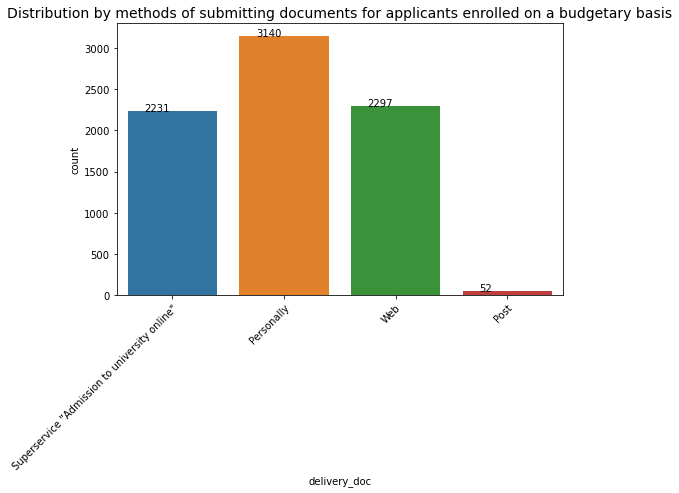

In [138]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'delivery_doc', data = df_yes)
ax.set_title('Distribution by methods of submitting documents for applicants enrolled on a budgetary basis', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

In [139]:
yes_number_how_app = Counter(df_yes.delivery_doc.values)
df_yes_how_app = pd.DataFrame({
     'method of submitting documents': yes_number_how_app.keys(),
     'number of applicants': yes_number_how_app.values()})

#### Distribution by reasons for admission, levels of education, types of education

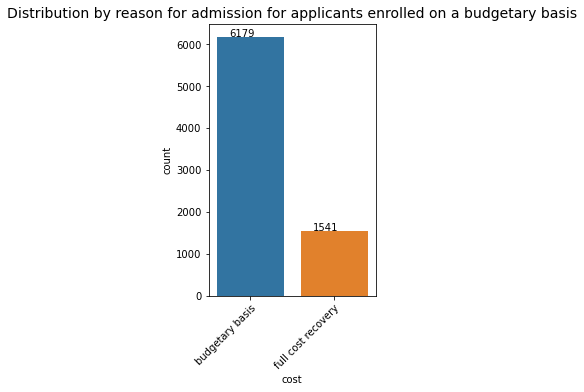

In [140]:
plt.figure(figsize=(3,5))
ax = sns.countplot(x = 'cost', data = df_yes)
ax.set_title('Distribution by reason for admission for applicants enrolled on a budgetary basis', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

In [141]:
yes_number_cost = Counter(df_yes.cost.values)
df_yes_cost = pd.DataFrame({
     'reason for admission': yes_number_cost.keys(),
     'number of applicants': yes_number_cost.values()})

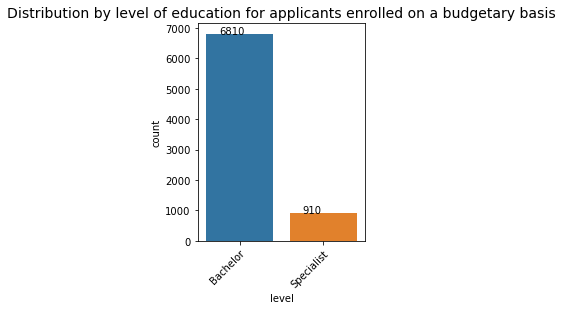

In [142]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x = 'level', data = df_yes)
ax.set_title('Distribution by level of education for applicants enrolled on a budgetary basis', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

In [143]:
yes_number_level = Counter(df_yes.level.values)
df_yes_level = pd.DataFrame({
     'level of education': yes_number_level.keys(),
     'number of applicants': yes_number_level.values()})

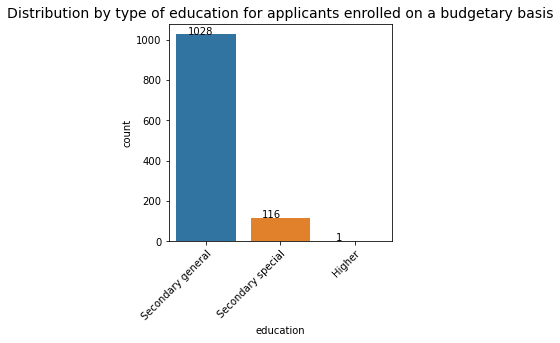

In [144]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'education', data = yes_portrait)
ax.set_title('Distribution by type of education for applicants enrolled on a budgetary basis', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

In [145]:
yes_number_educ = Counter(yes_portrait.education.values)
df_yes_educ = pd.DataFrame({
     'type of education': yes_number_educ.keys(),
     'number of applicants': yes_number_educ.values()})

#### Number of applications, including by faculties and fields of study

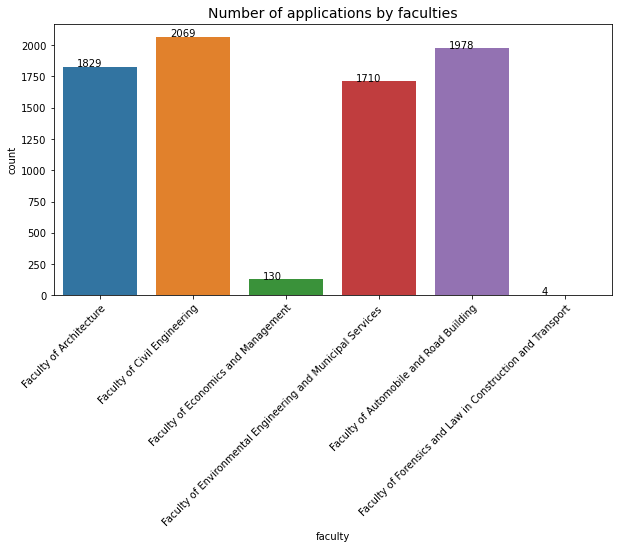

In [146]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'faculty', data = df_yes)
ax.set_title('Number of applications by faculties', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

In [147]:
yes_number_faculty = Counter(df_yes.faculty.values)
df_yes_faculty = pd.DataFrame({
     'faculty': yes_number_faculty.keys(),
     'number of applicants': yes_number_faculty.values()})

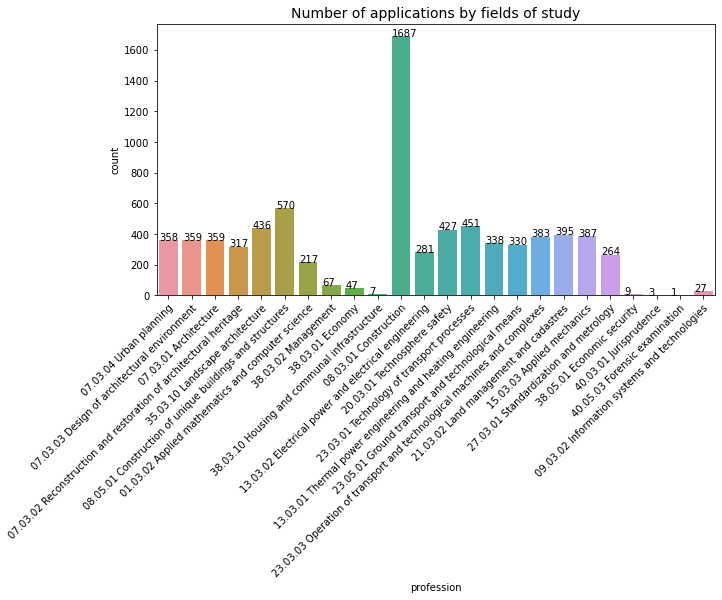

In [148]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'profession', data = df_yes)
ax.set_title('Number of applications by fields of study', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.02, p.get_height()+0.1))

In [149]:
yes_number_profession = Counter(df_yes.profession.values)
df_yes_profession = pd.DataFrame({
     'field of study': yes_number_profession.keys(),
     'number of applicants': yes_number_profession.values()})

In [150]:
fac_prof_yes_count = df_yes[['faculty', 'profession']]
fac_prof_yes_count
faculty_name = []
profession_name = []
profession_count = []
for j in range(len(fac_prof_yes_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False))):
    faculty_name.append(fac_prof_yes_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False).index[j][1])
    profession_name.append(fac_prof_yes_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False).index[j][0])
    profession_count.append(fac_prof_yes_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False).values[j])
FP_yes_count = pd.DataFrame({
     'faculty_name': faculty_name,
     'profession_name': profession_name,
     'profession_count': profession_count
})
FP_yes_count.head(1)

faculty_name        profession_name  profession_count
0  Faculty of Civil Engineering  08.03.01 Construction               991

## Portrait of an applicant enrolled on a budgetary basis:
### 1. An 18-year-old applicant (more likely female) from one of the following federal districts: Northwestern (St. Petersburg, Leningrad, Arkhangelsk, Pskov, Vologda, Murmansk region) / Southern (Krasnodar region) / Volga (Tatarstan, Bashkortostan) / Ural (Khanty-Mansiysk Autonomous Okrug), has a secondary general education, submitted an average of 6 applications through the Superservice "Admission to university online" / in person / through a personal account on the SPbGASU website and wants to enroll at the expense of the federal budget for a bachelor's training program, having , on average, 240 total points according to the Unified State Examination results.
### 2. Among the specialties, he is especially attracted to the following areas at the Faculty of Construction and the Faculty of Architecture: 08.03.01 Construction, 08.05.01 Construction of unique buildings and structures, 07.03.01 Architecture, 35.03.10 Landscape architecture, 07.03.04 Urban planning, 07.03.03 Design of architectural environment.  At the Faculty of Automobile and Road Building and the Faculty of Environmental Engineering and Municipal Services, the applicant shows the greatest interest in the following specialties: 08.03.01 Construction, 23.03.01 Technology of transport processes, 20.03.01 Technosphere safety, 21.03.02 Land management and cadastres, 15.03.03 Applied mechanics, 23.03.03 Operation of transport and technological machines and complexes.
### 3. 20% of applicants enrolled on a budgetary basis intend to enroll in SPbGASU and signed an agreement to enroll before the publication of competitive lists.

## Non-enrolled applicant:

In [151]:
df_no = df.copy()

In [152]:
for i in range(len(df_yes['id'].unique())):
    df_no.loc[df_no['id'] == (df_yes['id'].unique()[i]), 'id'] = np.nan
df_no = df_no.dropna(subset=['id'])

In [153]:
df_no.status.value_counts()

Submitted                         16284
Withdrawn                          1818
Dropped out of the competition      808
Enrolled                            736
Name: status, dtype: int64

In [154]:
for i in (df_no[df_no.status == 'Enrolled']['id'].unique()):
    df_no.loc[df_no['id'] == i, 'id'] = np.nan
df_no = df_no.dropna(subset=['id'])

In [155]:
df_no.status.value_counts()

Submitted                         13978
Withdrawn                          1681
Dropped out of the competition      774
Name: status, dtype: int64

In [156]:
df_no['date_consent'][df_no['date_consent'].notnull()] = pd.to_datetime(df_no['date_consent'], 
                              format = '%d.%m.%Y %H:%M:%S')

In [157]:
df_no.head(3)

id   date_app  sum_points  sum_points_ind consent  gender  \
27  171-742-177 2022-07-22       270.0               0      No    Male   
28  171-742-177 2022-07-22       270.0               0      No    Male   
38    000101247 2022-07-08       259.0               0      No  Female   

   date_birth nationality             cost              privileges       form  \
27 2004-01-15      RUSSIA  budgetary basis  Having a special right  full-time   
28 2004-01-15      RUSSIA  budgetary basis  Having a special right  full-time   
38 2004-05-02      RUSSIA  budgetary basis  Having a special right  full-time   

       level                                    profession  \
27  Bachelor                           38.03.02 Management   
28  Bachelor                              38.03.01 Economy   
38  Bachelor  07.03.03 Design of architectural environment   

                                faculty                 region  \
27  Faculty of Economics and Management  Saint Petersburg city   
28  Faculty of Economics and Management  Saint Petersburg city   
38              Faculty of Architecture         Khabarovsk reg   

            education  date_end     status delivery_doc date_consent  
27  Secondary general      2022  Submitted          Web          NaN  
28  Secondary general      2022  Submitted          Web          NaN  
38  Secondary general      2022  Submitted          Web          NaN

#### The "df_no" dataframe contains data on all applications of applicants who were not accepted into any field of study.

#### Number of non-enrolled applicants:

In [158]:
print(f'Number of non-enrolled applicants: {len(df_no.id.unique())}.')

Number of non-enrolled applicants: 3289.


#### Average total score:

In [159]:
no_sum_points = df_no[['id', 'sum_points', 'sum_points_ind']]
no_sum_points = no_sum_points.drop_duplicates()
no_sum_points.head(3)

id  sum_points  sum_points_ind
27  171-742-177       270.0               0
38    000101247       259.0               0
52  159-784-901       239.0               0

In [160]:
print('Average total score:', round(no_sum_points.sum_points.mean()))

Average total score: 202


In [161]:
df_no_average_sum = pd.DataFrame({
     'Non-enrolled applicants': no_sum_points.sum_points.values
})

#### Distribution by gender:

In [162]:
no_portrait = df_no[['id', 'date_birth', 'gender', 'region', 'nationality', 'education']]
no_portrait = no_portrait.drop_duplicates()
no_portrait.head(3)

id date_birth  gender                 region nationality  \
27  171-742-177 2004-01-15    Male  Saint Petersburg city      RUSSIA   
38    000101247 2004-05-02  Female         Khabarovsk reg      RUSSIA   
52  159-784-901 2004-09-13  Female          Saratovsk reg      RUSSIA   

            education  
27  Secondary general  
38  Secondary general  
52  Secondary general

In [163]:
no_portrait.groupby('gender').count().reset_index()

gender    id  date_birth  region  nationality  education
0  Female  1707        1707    1688         1707       1707
1    Male  1583        1583    1556         1583       1583

#### Average age:

In [164]:
no_portrait['age'] = (2022 - no_portrait.date_birth.dt.year)
print('Average age of an applicant:', round(no_portrait['age'].mean()))

Average age of an applicant: 18


#### Distribution by region of registration:

In [165]:
no_portrait[['id', 'region']].groupby('region').count().reset_index().sort_values(by = 'id', ascending = False)[:10]

region    id
58                        Saint Petersburg city  1016
37                                Leningrad reg   222
33                                Krasnodar reg   118
67                                Tatarstan rep   100
6                             Bashkortostan rep    80
3                               Arkhangelsk reg    69
29  Khanty-Mansiysk Autonomous Okrug - Yugra ao    62
61                                   Samara reg    56
20                              Kaliningrad reg    55
44                                 Murmansk reg    52

#### Distribution by citizenship:

In [166]:
no_portrait[['id', 'nationality']].groupby('nationality').count().reset_index().sort_values(by = 'id', ascending = False)

nationality    id
9                   RUSSIA  3237
6               KAZAKHSTAN    23
2                  BELARUS     7
15              UZBEKISTAN     4
12              TAJIKISTAN     3
3                    CHINA     3
7               KYRGYZSTAN     2
1               AZERBAIJAN     2
0              AFGHANISTAN     1
14                 UKRAINE     1
13            TURKMENISTAN     1
8                   LATVIA     1
11            SAUDI ARABIA     1
10                  RWANDA     1
5   IRAN, ISLAMIC REPUBLIC     1
4                  GEORGIA     1
16                   YEMEN     1

#### Let's check how confident the non-enrolled applicant was in choosing SPbGASU:

#### We need to collect unique applicants: those who consented to enrollment and those who did not.

In [167]:
df_no_consent = df_no[['id', 'date_consent']][df_no.date_consent.notnull()]
df_no_consent['date_consent'] = pd.to_datetime(df_no_consent['date_consent'], 
                              format = '%d.%m.%Y %H:%M:%S')
df_no_consent.head(3)

id        date_consent
250  160-352-604 2022-07-22 16:26:13
301  164-164-053 2022-07-11 16:19:22
360  161-950-973 2022-07-26 12:43:01

In [168]:
df_no_all_consent = pd.DataFrame({
     'id_unique': df_no[['id', 'date_consent']].groupby('id').date_consent.unique().index,
     'date_consent': np.nan
})

for i in df_no_consent.id.unique():
    df_no_all_consent.loc[df_no_all_consent['id_unique'] == i, 'date_consent'] = \
    pd.to_datetime(df_no_consent.date_consent.loc[df_no_consent['id'] == i].values[0])

df_no_all_consent['date_consent'][df_no_all_consent['date_consent'].notnull()] = \
pd.to_datetime(df_no_all_consent['date_consent'],format = '%d.%m.%Y %H:%M:%S')

df_no_all_consent.head()

id_unique         date_consent
0  000041219  2022-07-22 15:02:46
1  000064296                  NaN
2  000066190                  NaN
3  000066676                  NaN
4  000068343                  NaN

In [169]:
df_no_all_consent['consent_before_pub'] = ['uncertain' for i in range(df_no_all_consent.shape[0])]
df_no_all_consent.loc[df_no_all_consent['date_consent'] < date_pub, 'consent_before_pub'] = 'confident'
df_no_all_consent[['id_unique', 'consent_before_pub']].groupby('consent_before_pub').count().reset_index()

consent_before_pub  id_unique
0          confident         42
1          uncertain       3247

#### Average number of applications per applicant:

In [170]:
df_no_app = pd.DataFrame({
     'id_unique': df_no.groupby('id').date_app.count().index,
     'number_of_app': df_no.groupby('id').date_app.count().values
})
df_no_app.sort_values('number_of_app')

id_unique  number_of_app
589   154-579-120              1
1551  166-283-584              1
614   155-626-812              1
616   155-675-096              1
2867  190-398-540              1
...           ...            ...
1576  166-421-992             22
1230  164-477-273             22
2517  176-315-922             22
2093  170-313-894             22
2874  190-622-343             30

[3289 rows x 2 columns]

In [171]:
df_no_app.describe()

number_of_app
count    3289.000000
mean        4.996351
std         3.730503
min         1.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        30.000000

#### Distribution by methods of submitting documents:

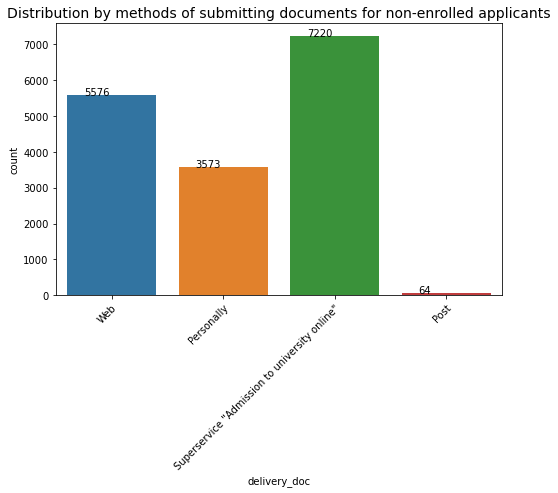

In [172]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'delivery_doc', data = df_no)
ax.set_title('Distribution by methods of submitting documents for non-enrolled applicants', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

In [173]:
no_number_how_app = Counter(df_no.delivery_doc.values)
df_no_how_app = pd.DataFrame({
     'method of submitting documents': no_number_how_app.keys(),
     'number of applicants': no_number_how_app.values()})

#### Distribution by reasons for admission, levels of education, types of education

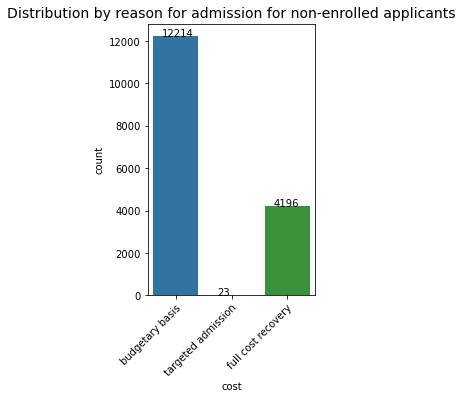

In [174]:
plt.figure(figsize=(3,5))
ax = sns.countplot(x = 'cost', data = df_no)
ax.set_title('Distribution by reason for admission for non-enrolled applicants', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

In [175]:
no_number_cost = Counter(df_no.cost.values)
df_no_cost = pd.DataFrame({
     'reason for admission': no_number_cost.keys(),
     'number of applicants': no_number_cost.values()})

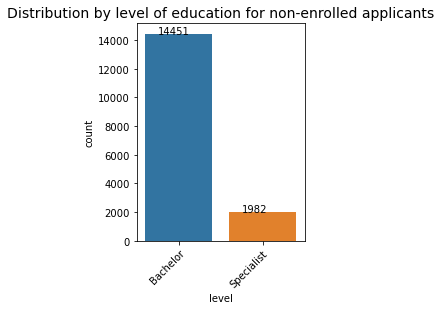

In [176]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x = 'level', data = df_no)
ax.set_title('Distribution by level of education for non-enrolled applicants', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

In [177]:
no_number_level = Counter(df_no.level.values)
df_no_level = pd.DataFrame({
     'level of education': no_number_level.keys(),
     'number of applicants': no_number_level.values()})

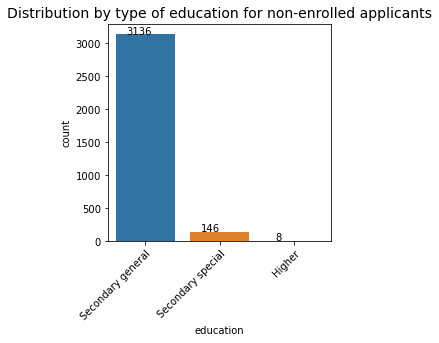

In [178]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'education', data = no_portrait)
ax.set_title('Distribution by type of education for non-enrolled applicants', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

In [179]:
no_number_educ = Counter(no_portrait.education.values)
df_no_educ = pd.DataFrame({
     'type of education': no_number_educ.keys(),
     'number of applicants': no_number_educ.values()})

#### Number of applications, including by faculties and fields of study

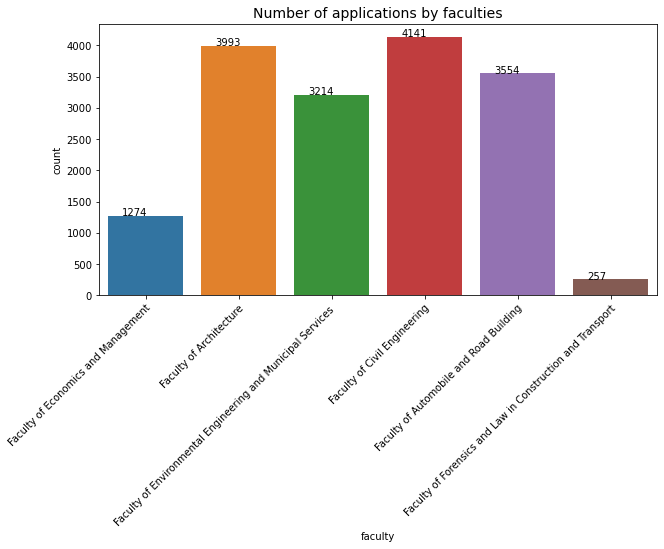

In [180]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'faculty', data = df_no)
ax.set_title('Number of applications by faculties', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

In [181]:
no_number_faculty = Counter(df_no.faculty.values)
df_no_faculty = pd.DataFrame({
     'faculty': no_number_faculty.keys(),
     'number of applicants': no_number_faculty.values()})

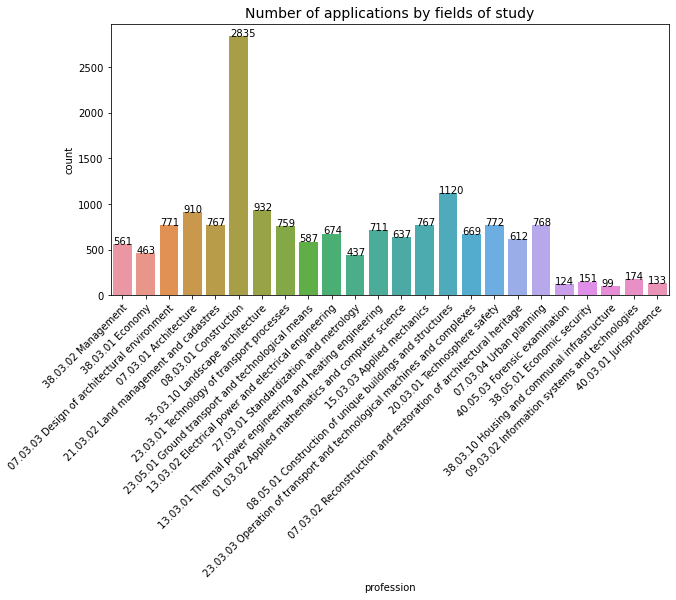

In [182]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'profession', data = df_no)
ax.set_title('Number of applications by fields of study', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.02, p.get_height()+0.1))

In [183]:
no_number_profession = Counter(df_no.profession.values)
df_no_profession = pd.DataFrame({
     'field of study': no_number_profession.keys(),
     'number of applicants': no_number_profession.values()})

In [184]:
fac_prof_no_count = df_no[['faculty', 'profession']]
fac_prof_no_count
faculty_name = []
profession_name = []
profession_count = []
for j in range(len(fac_prof_no_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False))):
    faculty_name.append(fac_prof_no_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False).index[j][1])
    profession_name.append(fac_prof_no_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False).index[j][0])
    profession_count.append(fac_prof_no_count.groupby(['profession', 'faculty'])['profession'].count().sort_values(ascending = False).values[j])
FP_no_count = pd.DataFrame({
     'faculty_name': faculty_name,
     'profession_name': profession_name,
     'profession_count': profession_count
})
FP_no_count.head(1)

faculty_name        profession_name  profession_count
0  Faculty of Civil Engineering  08.03.01 Construction              1773

## Portrait of a non-enrolled applicant:
### 1. An 18-year-old applicant (more likely female) from one of the following federal districts: Northwestern (St. Petersburg, Leningrad, Arkhangelsk, Kaliningrad, Murmansk regions) / Southern (Krasnodar region) / Volga (Tatarstan, Bashkortostan, Samara region )/ Ural (Khanty-Mansiysk Autonomous Okrug), has a general secondary education, submitted an average of 4 applications through the Superservice “Admission to university online” / in person / through a personal account on SPbGASU website and wishes to enroll at the expense of the federal budget for a bachelor’s training program, having, on average, 202 total points according to the Unified State Examination results.
### 2. Among the specialties, he is especially attracted to the following areas at the Faculty of Construction and the Faculty of Architecture: 08.03.01 Construction, 08.05.01 Construction of unique buildings and structures, 07.03.01 Architecture, 35.03.10 Landscape architecture, 07.03.04 Urban planning, 07.03.03 Design of architectural environment.  At the Faculty of Automobile and Road Building and the Faculty of Environmental Engineering and Municipal Services, the applicant shows the greatest interest in the following specialties: 08.03.01 Construction, 23.03.01 Technology of transport processes, 20.03.01 Technosphere safety, 21.03.02 Land management and cadastres, 15.03.03 Applied mechanics, 13.03.01 Thermal power engineering and heating engineering.
### 3. The applicant is completely unsure of his intention to enroll in SPbGASU and did not sign an agreement to enroll before the publication of the competitive lists.

## Let's compare two groups of applicants

#### Distribution by gender:

In [185]:
fig1 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                     subplot_titles=('Applicants enrolled on a budgetary basis', 'Non-enrolled applicants'))
fig1.add_trace(go.Pie(labels=yes_portrait.groupby('gender').count().reset_index()['gender'],
                      values = yes_portrait.groupby('gender').count().reset_index()['id'], hole=0.5),
              1, 1)
fig1.add_trace(go.Pie(labels=no_portrait.groupby('gender').count().reset_index()['gender'],
                      values = no_portrait.groupby('gender').count().reset_index()['id'], hole=0.5),
              1, 2)
fig1.update_layout(title='Distribution by gender')
fig1.show()

### The ratio of men to women for the two groups is approximately the same, with a slight predominance of female applicants for those enrolled on a budgetary basis.

#### Distribution by region of registration:

In [186]:
fig2 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                     subplot_titles=('Applicants enrolled on a budgetary basis', 'Non-enrolled applicants'))
fig2.add_trace(go.Pie(labels=yes_portrait[['id', 'region']].groupby('region').count().reset_index(). \
                      sort_values(by = 'id', ascending = False)['region'], values = yes_portrait[['id', 'region']]. \
                      groupby('region').count().reset_index().sort_values(by = 'id', ascending = False)['id'], hole=0.5),
              1, 1)
fig2.add_trace(go.Pie(labels=no_portrait[['id', 'region']].groupby('region').count().reset_index(). \
                      sort_values(by = 'id', ascending = False)['region'], values = no_portrait[['id', 'region']]. \
                      groupby('region').count().reset_index().sort_values(by = 'id', ascending = False)['id'], hole=0.5),
              1, 2)
fig2.update_traces(textposition='inside')
fig2.update_layout(uniformtext_minsize=12, uniformtext_mode='hide', title='Distribution by region of registration')
fig2.show()

### 40% of the applicants enrolled on the budget live in the regions of Russia (mainly in the Southern, Volga, and Ural federal districts). 48% of applicants who were enrolled on the budget are from St. Petersburg and the Leningrad region. Among the non-enrolled applicants, the share of those living in St. Petersburg and the Leningrad region is 38%.

#### Distribution by citizenship:

In [187]:
fig3a = px.bar(yes_portrait[['id', 'nationality']].groupby('nationality').count().reset_index(). \
               sort_values(by = 'id', ascending = False), x='nationality', y='id', text='id', color = 'nationality',
               title='Distribution by citizenship among applicants enrolled on a budgetary basis')
fig3a.update_layout(xaxis_title="Country of Citizenship", yaxis_title="Number of applicants", height=400, width = 750)
fig3a.show()

In [188]:
fig3b = px.bar(no_portrait[['id', 'nationality']].groupby('nationality').count().reset_index(). \
               sort_values(by = 'id', ascending = False), x='nationality', y='id', text='id', color = 'nationality',
               title='Distribution by citizenship among non-enrolled applicants')
fig3b.update_layout(xaxis_title="Country of Citizenship", yaxis_title="Number of applicants", height=500, width = 1000)
fig3b.show()

### Most foreign applicants failed to enroll on a budget. Among the non-enrolled applicants, there is a wide variety of countries by citizenship. Foreign applicants from 4 countries (Kazakhstan, Uzbekistan, Belarus and Turkmenistan) managed to enroll on a budgetary basis.

#### Average total score:

In [189]:
fig4 = go.Figure()
fig4.add_trace(go.Box(y=df_yes_average_sum["Applicants enrolled on a budgetary basis"],
                      name="Applicants enrolled on a budgetary basis"))
fig4.add_trace(
    go.Box(y=df_no_average_sum['Non-enrolled applicants'], name="Non-enrolled applicants"))
fig4.update_layout(
    font_family="Averta",
    hoverlabel_font_family="Averta",
    title_text="Distribution by total score",
    xaxis_title_text="Applicants",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_text="Total score",
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    height=600, 
    width=800,
    showlegend=False)
fig4.show()

### The average total score of an applicant enrolled on a budgetary basis is 38 points higher than that of a non-enrolled applicant (the difference in the median is 25 points). Among non-enrolled applicants, there is a large number of people with a low (<100) total score. Among those enrolled on a budgetary basis, many have a high score (>300).

#### Average age:

In [190]:
fig5 = go.Figure()
fig5.add_trace(go.Box(y=yes_portrait['age'], name="Applicants enrolled on a budgetary basis"))
fig5.add_trace(
    go.Box(y=no_portrait['age'], name="Non-enrolled applicants"))
fig5.update_layout(
    font_family="Averta",
    hoverlabel_font_family="Averta",
    title_text="Age distribution",
    yaxis_title_text="Age",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    height=600, 
    width=800,
    showlegend=False)
fig5.show()

### The age range is large for non-enrolled applicants (17-51 years old), while for applicants enrolled on a budgetary basis it is much lower (17-23 years old). The average age of applicants from the two groups is approximately the same (18 years).

#### How confident were applicants when choosing SPbGASU for admission?

In [191]:
fig6 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                     subplot_titles=('Applicants enrolled on a budgetary basis', 'Non-enrolled applicants'))
fig6.add_trace(go.Pie(labels=df_yes_consent[['id', 'consent_before_pub']]. \
                      groupby('consent_before_pub').count().reset_index()['consent_before_pub'], \
                      values = df_yes_consent[['id', 'consent_before_pub']]. \
                      groupby('consent_before_pub').count().reset_index()['id'], hole=0.5),
              1, 1)
fig6.add_trace(go.Pie(labels=df_no_all_consent[['id_unique', 'consent_before_pub']]. \
                      groupby('consent_before_pub').count().reset_index()['consent_before_pub'], \
                      values = df_no_all_consent[['id_unique', 'consent_before_pub']]. \
                      groupby('consent_before_pub').count().reset_index()['id_unique'], hole=0.5),
              1, 2)
fig6.update_layout(title='The ratio of consents to enrollment before the publication of competitive lists',
                   annotations=[dict(text='Applicants enrolled on a budgetary basis', x=0.22, y=0.45, font_size=20,
                                     showarrow=False), dict(text='Non-enrolled applicants', x=0.78, y=0.45,
                                                            font_size=20, showarrow=False)])
fig6.show()

### Before the publication of the competitive lists, applicants enrolled on a budgetary basis were much more confident in their intention to enter SPbGASU. Every fifth applicant among those enrolled on a budgetary basis submitted consent to enrollment before the publication of competitive lists. Among the non-enrolled applicants, 99% did not submit their consent before the publication of the competitive lists.

#### Average number of applications per applicant:

In [192]:
fig7 = go.Figure()
fig7.add_trace(go.Box(y=df_yes_app['number_of_app'], name="Applicants enrolled on a budgetary basis"))
fig7.add_trace(
    go.Box(y=df_no_app['number_of_app'], name="Non-enrolled applicants"))
fig7.update_layout(
    font_family="Averta",
    hoverlabel_font_family="Averta",
    title_text="Distribution by number of applications per applicant",
    yaxis_title_text="Number of applications",
    xaxis_title_font_size=18,
    xaxis_tickfont_size=16,
    yaxis_title_font_size=18,
    yaxis_tickfont_size=16,
    hoverlabel_font_size=16,
    height=600, 
    width=800,
    showlegend=False)
fig7.show()

### Those enrolled on a budgetary basis more actively submitted applications for admission. The average number of applications per applicant enrolled on a budgetary basis is 6, per non-enrolled applicant - 4.

#### Distribution by methods of submitting documents:

In [193]:
fig8 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                     subplot_titles=('Applicants enrolled on a budgetary basis', 'Non-enrolled applicants'))
fig8.add_trace(go.Pie(labels=df_yes_how_app['method of submitting documents'], values = df_yes_how_app['number of applicants'],
                      hole=0.5),1, 1)
fig8.add_trace(go.Pie(labels=df_no_how_app['method of submitting documents'], values = df_no_how_app['number of applicants'],
                      hole=0.5),1, 2)
fig8.update_layout(title='Distribution by method of document submission')
fig8.show()

### Applicants enrolled on a budgetary basis were significantly more likely to apply in person than non-enrolled applicants. However, both groups generally preferred the remote method of submitting documents.

#### Distribution by reasons for admission, levels of education, types of education:

In [194]:
fig9 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                     subplot_titles=('Applicants enrolled on a budgetary basis', 'Non-enrolled applicants'))
fig9.add_trace(go.Pie(labels=df_yes_cost['reason for admission'], values = df_yes_cost['number of applicants'], hole=0.5),
              1, 1)
fig9.add_trace(go.Pie(labels=df_no_cost['reason for admission'], values = df_no_cost['number of applicants'], hole=0.5),
              1, 2)
fig9.update_layout(title='Distribution by reasons for admission')
fig9.show()

### Both groups preferred to study on a budgetary basis. Non-enrolled applicants more actively chose paid methods of study (full cost recovery and targeted admission). Applicants enrolled on a budgetary basis did not choose targeted admission.

In [195]:
fig10 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                      subplot_titles=('Applicants enrolled on a budgetary basis', 'Non-enrolled applicants'))
fig10.add_trace(go.Pie(labels=df_yes_level['level of education'], values = df_yes_level['number of applicants'], hole=0.5),
              1, 1)
fig10.add_trace(go.Pie(labels=df_no_level['level of education'], values = df_no_level['number of applicants'], hole=0.5),
              1, 2)
fig10.update_layout(title='Distribution by level of education')
fig10.show()

### The distribution of desired levels of education for the two groups is the same.

In [196]:
fig11 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                      subplot_titles=('Applicants enrolled on a budgetary basis', 'Non-enrolled applicants'))
fig11.add_trace(go.Pie(labels=df_yes_educ['type of education'], values = df_yes_educ['number of applicants'], hole=0.5),
              1, 1)
fig11.add_trace(go.Pie(labels=df_no_educ['type of education'], values = df_no_educ['number of applicants'], hole=0.5),
              1, 2)
fig11.update_layout(title='Distribution by type of education')
fig11.show()

### The vast majority of applicants in both groups have secondary general education. Among those enrolled on a budgetary basis, there were more applicants with secondary special education; among those who non-enrolled there were more applicants who completed higher education.

#### Number of applications, including by faculties and fields of study:

In [197]:
fig12 = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                      subplot_titles=('Applicants enrolled on a budgetary basis', 'Non-enrolled applicants'))
fig12.add_trace(go.Pie(labels=df_yes_faculty['faculty'], values = df_yes_faculty['number of applicants'], hole=0.5),
              1, 1)
fig12.add_trace(go.Pie(labels=df_no_faculty['faculty'], values = df_no_faculty['number of applicants'], hole=0.5),
              1, 2)
fig12.update_layout(title='Distribution by faculties', legend_orientation="h", height=800, width=1000)
fig12.show()

### Applicants enrolled on a budgetary basis were interested in 4 faculties - Civil Engineering, Automobile and Road Building, Architecture and the Faculty of Environmental Engineering and Municipal Services, and in approximately the same ratio. Among the non-enrolled applicants, there was much more interest in the Faculty of Economics and Management and the Faculty of Forensics and Law in Construction and Transport (compared to those enrolled on a budgetary basis), although they showed their main interest in the same faculties as those enrolled on a budgetary basis.

In [198]:
fig13a = px.treemap(FP_yes_count,
                 path=['faculty_name', 'profession_name'],
                 values='profession_count',
                 title='Distribution by popularity of fields of study among applicants enrolled on a budgetary basis',
                 color='profession_count',
                 color_continuous_scale='RdBu')
fig13a.data[0].textinfo = 'label+value+percent parent'
fig13a.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig13a.show()

In [199]:
fig13b = px.treemap(FP_no_count,
                 path=['faculty_name', 'profession_name'],
                 values='profession_count',
                 title='Distribution by popularity of fields of study among non-enrolled applicants',
                 color='profession_count',
                 color_continuous_scale='RdBu')
fig13b.data[0].textinfo = 'label+value+percent parent'
fig13b.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig13b.show()

### In general, the distribution of popularity of fields of study for the two groups is similar. Among the non-enrolled applicants, one can note greater interest in the specialties offered by the Faculty of Architecture: Landscape architecture and Architecture, as well as less popular faculties (Faculty of Economics and Management and Faculty of Forensics and Law in Construction and Transport).

----

## We conducted a comparative analysis of the portraits of a non-enrolled applicant and those enrolled on a budgetary basis according to various parameters. Since the goal of our work is to help SPbGASU to properly structure work with applicants and become a center for attracting talent, let’s take a closer look at some of the signs of talented applicants whose total score is above the average for admitted applicants, but who did not enter SPbGASU for some reason.

In [200]:
df_no_sumpoints_high = df_no[['id', 'sum_points', 'region', 'nationality', 'date_birth', 'gender']]
df_no_sumpoints_high = df_no_sumpoints_high.drop_duplicates()
df_no_sumpoints_high = df_no_sumpoints_high[df_no_sumpoints_high['sum_points'] > \
                                            df_yes_average_sum['Applicants enrolled on a budgetary basis'].mean()]

#### Distribution by region of registration:

In [201]:
fig = px.pie(
    df_no_sumpoints_high.groupby('region').id.count().sort_values(ascending = False),
    values=df_no_sumpoints_high.groupby('region').id.count().sort_values(ascending = False).values,
    names=df_no_sumpoints_high.groupby('region').id.count().sort_values(ascending = False).index,
    hole=0.5
)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.update_layout(height=500, title='Distribution by region for non-enrolled applicants with a high total score')
fig.show()

### Among non-enrolled applicants with a high total score, 2/3 are from regions other than the Leningrad region and St. Petersburg.

#### Age distribution among non-enrolled applicants with a high total score:

In [202]:
df_no_sumpoints_high['age'] = 2022 - df_no_sumpoints_high['date_birth'].dt.year

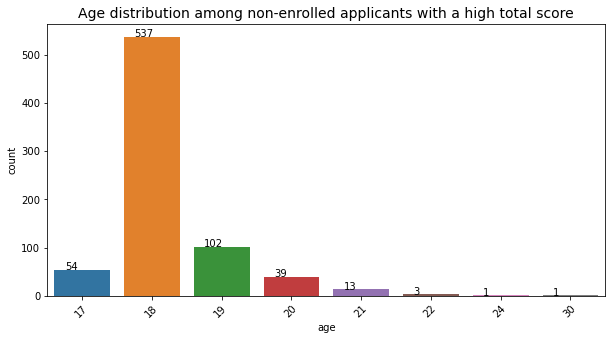

In [203]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'age', data = df_no_sumpoints_high)
ax.set_title('Age distribution among non-enrolled applicants with a high total score', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

### Among non-enrolled applicants with a high total score, the vast majority are young people aged 17 to 20 years. If these were older people, we could assume that the reason for their leaving could be family circumstances (the inability to combine study and childcare or study and work), but since in our case these are young people, the more likely reason is choice of another educational institution.

#### Distribution by gender among non-enrolled applicants with a high total score:

In [204]:
fig = px.pie(
    df_no_sumpoints_high.gender.value_counts(), values=df_no_sumpoints_high.gender.value_counts().values,
    names=df_no_sumpoints_high.gender.value_counts().index, hole=0.5)
fig.update_layout(title='Distribution by gender among non-enrolled applicants with a high total score')
fig.show()

### Among non-enrolled applicants with a high total score, 2/3 were female.

#### Distribution by reasons for admission:

In [205]:
df_no_sumpoints_high2 = df_no[['id', 'sum_points','cost']]
df_no_sumpoints_high2 = df_no_sumpoints_high2.drop_duplicates()
df_no_sumpoints_high2 = df_no_sumpoints_high2[df_no_sumpoints_high2['sum_points'] > \
                                              df_yes_average_sum['Applicants enrolled on a budgetary basis'].mean()]

In [206]:
df_no_sumpoints_high2.cost.value_counts()

budgetary basis       729
full cost recovery    225
targeted admission      6
Name: cost, dtype: int64

In [207]:
fig = px.pie(
    df_no_sumpoints_high2.cost.value_counts(), values=df_no_sumpoints_high2.cost.value_counts().values,
    names=df_no_sumpoints_high2.cost.value_counts().index, hole=0.5)
fig.update_layout(title='Distribution by reasons for admission among non-enrolled applicants with a high total score')
fig.show()

### Among the talented non-enrolled applicants, a quarter of people applied for targeted admission or full cost recovery.

#### Distribution by faculties and fields of study:

In [208]:
df_no_sumpoints_high3 = df_no[['id', 'faculty','profession', 'sum_points']]
df_no_sumpoints_high3 = df_no_sumpoints_high3.drop_duplicates()
df_no_sumpoints_high3 = df_no_sumpoints_high3[df_no_sumpoints_high3['sum_points'] > \
                                              df_yes_average_sum['Applicants enrolled on a budgetary basis'].mean()]

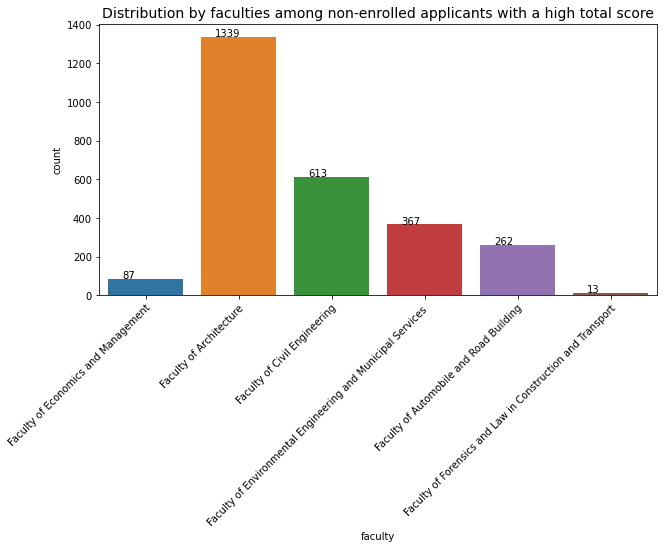

In [209]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'faculty', data = df_no_sumpoints_high3)
ax.set_title('Distribution by faculties among non-enrolled applicants with a high total score', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

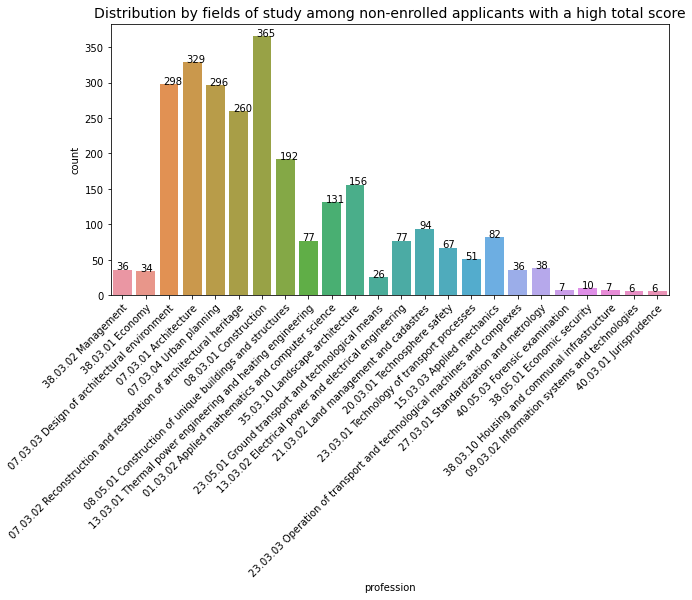

In [210]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x = 'profession', data = df_no_sumpoints_high3)
ax.set_title('Distribution by fields of study among non-enrolled applicants with a high total score', fontsize=14)
xlabels = ax.get_xticklabels()
ax.set_xticklabels(xlabels, rotation=45, ha='right', rotation_mode='anchor')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.02))

### Talented non-enrolled applicants were mainly interested in the fields of study offered by the Faculty of Architecture and the Faculty of Civil Engineering.

#### Let's build a distribution diagram based on the reasons for admission to popular fields of study: 08.03.01 Construction, 07.03.01 Architecture, 07.03.03 Design of architectural environment, 07.03.04 Urban planning, 07.03.02 Reconstruction and restoration of architectural heritage, 08.05.01 Construction of unique buildings and structures, 35.03.10 Landscape architecture, 01.03.02 Applied mathematics and computer science.

In [211]:
df_no_sumpoints_high4 = df_no[['id', 'faculty','profession', 'sum_points', 'cost']]
df_no_sumpoints_high4 = df_no_sumpoints_high4.drop_duplicates()
df_no_sumpoints_high4 = df_no_sumpoints_high4[df_no_sumpoints_high4['sum_points'] > \
                                              df_yes_average_sum['Applicants enrolled on a budgetary basis'].mean()]
df_no_sumpoints_high4 = df_no_sumpoints_high4[(df_no_sumpoints_high4['profession'] == '08.03.01 Construction') | \
                                              (df_no_sumpoints_high4['profession'] == '07.03.01 Architecture') | \
                                              (df_no_sumpoints_high4['profession'] == \
                                               '07.03.03 Design of architectural environment') | \
                                              (df_no_sumpoints_high4['profession'] == '07.03.04 Urban planning') | \
                                              (df_no_sumpoints_high4['profession'] == \
                                               '07.03.02 Reconstruction and restoration of architectural heritage') | \
                                              (df_no_sumpoints_high4['profession'] == \
                                               '08.05.01 Construction of unique buildings and structures') | \
                                              (df_no_sumpoints_high4['profession'] == '35.03.10 Landscape architecture') | \
                                              (df_no_sumpoints_high4['profession'] == \
                                               '01.03.02 Applied mathematics and computer science')]

In [212]:
fig = px.pie(
    df_no_sumpoints_high4.cost.value_counts(), values=df_no_sumpoints_high4.cost.value_counts().values,
    names=df_no_sumpoints_high4.cost.value_counts().index, hole=0.5)
fig.update_layout(title='Distribution by reasons for admission among non-enrolled applicants with a high total score')
fig.show()

### A quarter of talented non-enrolled applicants interested in popular destinations applied for full cost recovery or targeted admission.

## <span style="color:green"> $\checkmark$ </span> 7. General conclusion

### 1. In this work, an analysis of the admissions campaign data of the Saint Petersburg State University of Architecture and Civil Engineering for 2022 was carried out: general information about the campaign was studied, a portrait of the applicant was drawn up, and a comparative analysis of the portrait of an applicant enrolled on a budgetary basis and not enrolled in any field of study was carried out.
### 2. Saint Petersburg State University of Architecture and Civil Engineering is famous throughout Russia and even abroad. Many talented applicants strive to enroll in it to study. However, in the course of this work, we saw a large number of applicants who had a high total score, but did not enter or decided not to enter SPbGASU for some reason. In order for SPbGASU to properly structure work with applicants and become a center of attraction for talent, one should pay attention to non-enrolled applicants with a high total score:  
### 2.1 The likely reason for their decision is the choice of another educational institution.  
### 2.2 Talented non-enrolled applicants were mainly interested in the fields of study offered by the Faculty of Architecture and the Faculty of Civil Engineering: 08.03.01 Construction, 07.03.01 Architecture, 07.03.03 Design of architectural environment, 07.03.04 Urban planning, 07.03.02 Reconstruction and restoration of architectural heritage, 08.05.01 Construction of unique buildings and structures, 035.03.10 Landscape architecture, 01.03.02 Applied mathematics and computer science. A quarter of these applicants applied for full cost recovery or targeted admission. An increase in appropriate places in these specialties and reasons for admission may contribute to greater confidence among applicants in choosing SPbGASU.  
### 2.3 Two thirds of all talented non-enrolled people are registered in regions other than Saint Petersburg and the Leningrad region. An active campaign to attract talent in the regions and provide conditions for living and studying for nonresident students in Saint Petersburg during their studies can contribute to the greater popularity of SPbGASU as a priority university for admission.  
### 2.4 A comparative analysis of SPbGASU with Moscow universities offering similar fields of study may reveal other parameters for working to increase the prestige and popularity of SPbGASU among applicants in the country.